# Proyecto 04 - Informe Final

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA


En este informe se vuelve a abordar la **problemática** trabajada en el Proyecto 3, el cual tenía como objetivo **encontrar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019**, para la modalidad de pago en efectivo. El dataset que se utilizará en el desarrollo de este proyecto fue elaborado por Autopistas Urbanas S.A. (AUSA) y obtenido de la plataforma web Buenos Aires Data. El mismo contiene información del paso de vehículos por las unidades de peaje AUSA, de la cuales sólo se trabajará con la estación de peaje Illia para los años 2017 al 2019.

Este proyecto parte del análisis realizado anteriormente, por lo que incluye en principio la preparación del dataset, el análisis exploratorio de datos y las predicciones realizadas a través de modelos de Machine Learning mediante las técnicas de One-step y Multi-step Prediction, y luego se incorpora el **modelo autorregresivo integrado de media móvil (ARIMA)**, y los incluidos en librerías específicas para trabajar con Series de Tiempo, como **Prophet** o **AutoTS**, con el **objetivo** de encontar aquel que obtenga mejor desempeño en la predicción (es decir, que obtenga un menor nivel de error).

## Repositorio GitHub: https://github.com/javierdichiachio/ACAMICA_PROYECTOS_JD

# 1. PREPARACIÓN DEL DATASET

In [1]:
#importamos las librerias necesarias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set()
import locale  #Este modulo permite que los encodings sean transformados al lenguaje de la configuracion de la computadora
locale.setlocale(locale.LC_TIME, '')
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
80   2019-01-01         2  Martes     Centro       Liviano             537
86   2019-01-01         2  Martes     Centro        Pesado               1
88   2019-01-01         2  Martes  Provincia       Liviano             443
94   2019-01-01         2  Martes  Provincia        Pesado               1
149  2019-01-01         3  Martes     Centro       Liviano             769

In [11]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos              fecha2
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [12]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [13]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
1       Domingo  Provincia       Liviano               9 2017-01-01 00:00:00
2       Domingo  Provincia       Liviano             644 2017-01-01 00:00:00
3       Domingo  Provincia        Pesado               6 2017-01-01 00:00:00
4       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
...         ...        ...           ...             ...                 ...
238864   Martes  Provincia       Liviano             556 2019-12-31 22:00:00
238865   Martes  Provincia        Pesado               1 2019-12-31 22:00:00
238866   Martes     Centro       Liviano             580 2019-12-31 22:00:00
238867   Martes     Centro       Liviano             214 2019-12-31 23:00:00
238868   Martes  Provincia       Liviano             190 2019-12-31 23:00:00

[238869 rows x 5 columns]

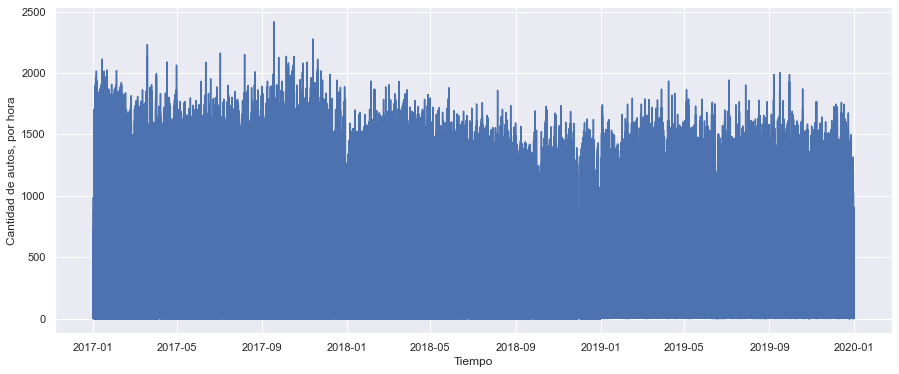

In [14]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [15]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486

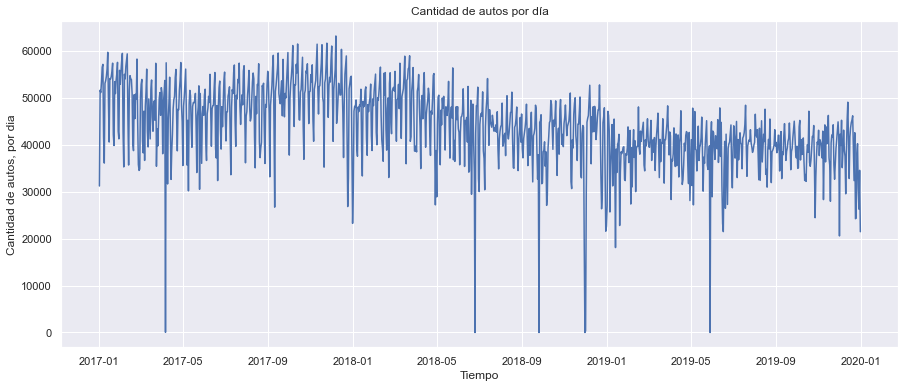

In [16]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title('Cantidad de autos por día')
plt.show()

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238869 entries, 0 to 238868
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   dia             238869 non-null  object        
 1   sentido         238869 non-null  object        
 2   tipo_vehiculo   238869 non-null  object        
 3   cantidad_pasos  238869 non-null  int64         
 4   fecha           238869 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 9.1+ MB


# 2. ANÁLIS EXPLORATORIO DE DATOS:

En primer lugar, analizaremos algunas características de nuestro dataset como para entender más acerca del problema. En primer medida sería útil conocer cuáles son los días y horas de la semana con más tráfico, la proporción de tráfico liviano y pesado que frecuentan la estación, y la proporción de registros que corresponden a cada sentido por el que se cruza a la estación.

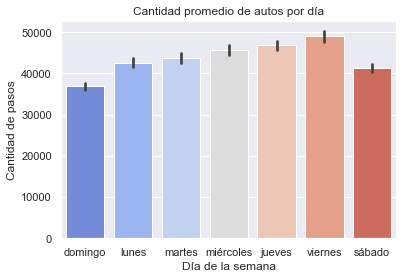

In [18]:
#Agregamos la columna con el día a nuestra serie de tiempo:
diario['dia'] = diario.index.strftime('%A')

#Graficamos la cantidad de pasos promedio por día:
plt.figure(figsize = (6,4))
sns.barplot(data = diario, x = 'dia', y = 'cantidad_pasos', palette = 'coolwarm')
plt.ylabel('Cantidad de pasos')
plt.xlabel('Día de la semana')
plt.title('Cantidad promedio de autos por día')
plt.show()

In [19]:
#Obtenemos los valores de promedio de pasos por día:
promedio_diario = diario.groupby(by = 'dia', sort = True).agg({'cantidad_pasos':'mean'})
promedio_diario

cantidad_pasos
dia                      
domingo      36891.471338
jueves       46808.775641
lunes        42620.299363
martes       43729.624204
miércoles    45676.448718
sábado       41293.044872
viernes      49020.974359

Como podemos ver, el día más concurrido de la semana es el día **viernes**, con una cantidad de pasos promedio de casi 50.000 autos.

A continuación realizaremos el mismo análisis para ver cuales son las horas con más afluencia de tráfico en la estación:

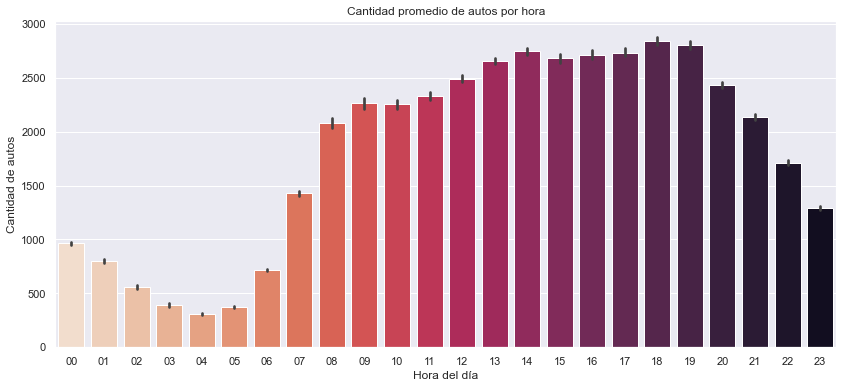

In [20]:
#En primer lugar, resampleamos nuestro dataset para llevarlo a nivel hora:
serie_horaria = dataset.resample('H', on = 'fecha').sum()

#Agregamos la columna 'hora' a nuestra serie de tiempo por hora:
serie_horaria['hora'] =  serie_horaria.index.strftime('%H')

#Observamos la cantidad de autos promedio por hora
plt.figure(figsize = (14,6))
sns.barplot(data = serie_horaria, x = 'hora', y = 'cantidad_pasos', palette = 'rocket_r')
plt.ylabel('Cantidad de autos')
plt.xlabel('Hora del día')
plt.title('Cantidad promedio de autos por hora');

In [21]:
#Obtenemos los valores de promedio de pasos por hora:
promedio_hora = serie_horaria.groupby(by = 'hora').agg({'cantidad_pasos':'mean'})
promedio_hora

cantidad_pasos
hora                
00        965.425571
01        802.845662
02        561.273059
03        392.600913
04        305.808219
05        375.643836
06        713.805479
07       1428.322374
08       2079.431050
09       2261.827397
10       2257.342466
11       2329.780822
12       2492.574429
13       2655.698630
14       2744.820091
15       2678.893151
16       2711.934247
17       2733.991781
18       2844.781735
19       2804.981735
20       2430.945205
21       2136.939726
22       1713.068493
23       1290.123288

Adicionalmente, sería interesante conocer la distribución del tráfico en cuanto al tipo de vehículo y el sentido en el que cruzan la estación:

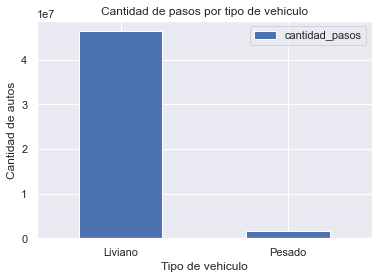

In [22]:
#Observamos el tipo de vehículos que frecuentan la estación:
plt.rcParams['figure.figsize'] = [6,4]
dataset.groupby('tipo_vehiculo').sum().plot.bar()
plt.ylabel('Cantidad de autos')
plt.xlabel('Tipo de vehiculo')
plt.xticks(rotation=0)
plt.title('Cantidad de pasos por tipo de vehiculo')
plt.show();

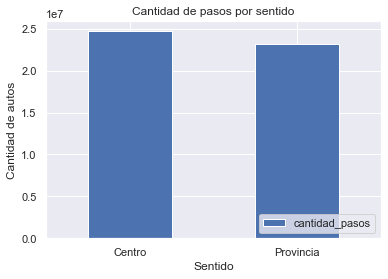

In [23]:
#Observamos la cantidad de pasos por sentido:
plt.rcParams['figure.figsize'] = [6,4]
dataset.groupby('sentido').sum().plot.bar()
plt.ylabel('Cantidad de autos')
plt.xlabel('Sentido')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.title('Cantidad de pasos por sentido')
plt.show()

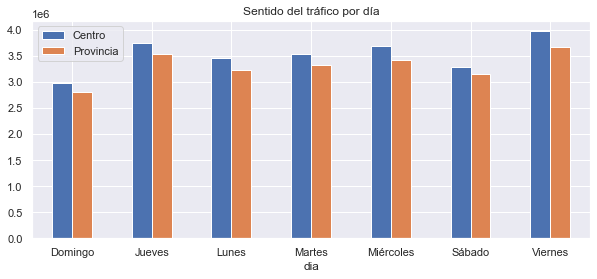

In [24]:
#Asimismo, observamos la cantidad de pasos por sentido en función al día de la semana:
plt.rcParams['figure.figsize'] = [10,4]
dataset.groupby(['sentido','dia']).sum().cantidad_pasos.unstack(0).plot.bar()
plt.legend(loc='upper left')
plt.xticks(rotation=0)
plt.title('Sentido del tráfico por día');

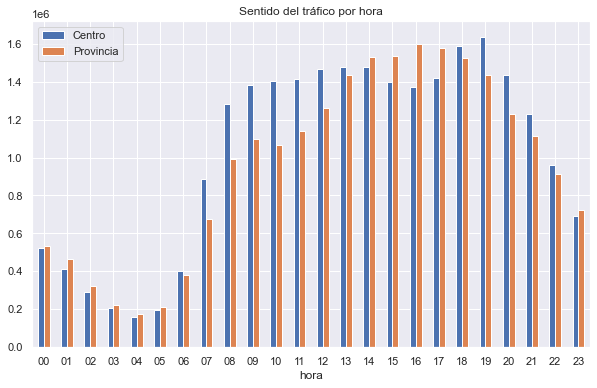

In [25]:
#Y por último, observamos la cantidad de pasos por sentido en función a la hora del día:
dataset['hora'] =  [d.strftime('%H') for d in dataset.fecha]
plt.rcParams['figure.figsize'] = [10,6]
dataset.groupby(['sentido','hora']).sum().cantidad_pasos.unstack(0).plot.bar()
plt.legend(loc='upper left')
plt.xticks(rotation=0)
plt.title('Sentido del tráfico por hora');

Tal cual podemos ver, el tipo de vehículo que más frecuenta la estación es el liviano, la franja horaria con más afluencia de tráfico es entre las 18-19 horas (momento en que termina la jornada laboral/escolar), el número de pasos por día en dirección hacia el Centro es mayor a los pasos hacia Provincia, y el tráfico disminuye los fines de semana, por lo cual una primera conclusión podría ser es que la estación es muy utilizada por particulares que ingresan a la ciudad los días de semana, ya sea para trabajar o llevar a sus hijos al colegio. Asimismo, atendiendo al último gráfico, podemos ver que el tráfico hacia el centro es mayor en las primeras horas de la mañana, revirtiendose alrededor de las horas en que finaliza la jornada laboral/educativa promedio (entre las 17 y 20 horas).

A continuación haremos una transformación de nuestra serie para analizar el comportamiento de la serie de tiempo a nivel semanal y mensual:

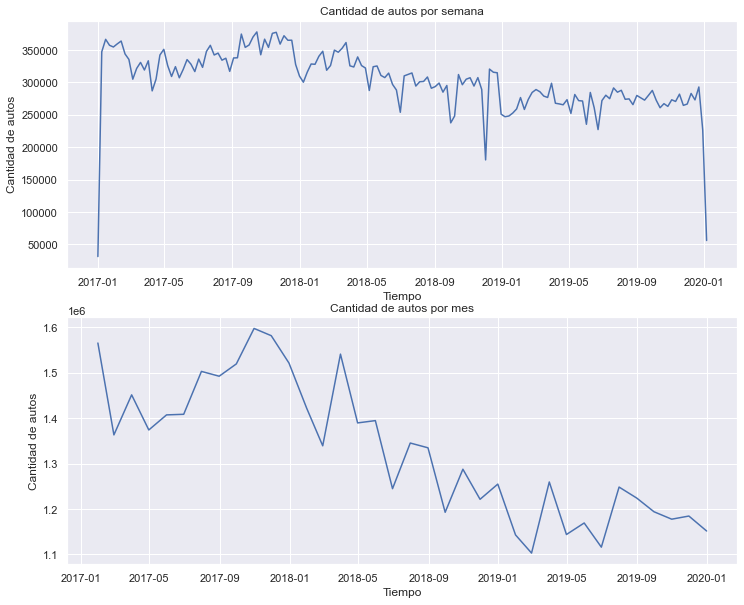

In [26]:
#Resampleamos el dataset para llevarlo a nivel semanal y mensual y observar gráficamente las series temporales:

semanal = dataset.resample('W', on = 'fecha').sum()
mensual = dataset.resample('M', on = 'fecha').sum()

#Graficamos
plt.figure(figsize = (12,10))

plt.subplot(2,1,1)
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos por semana')

plt.subplot(2,1,2)
plt.plot(mensual.index, mensual.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos por mes')
plt.savefig('Resampleo semanal y mensual.jpg')
plt.show()

Otro gráfico que sería interesante analizar sería la evolución de la cantidad mensual de autos que pasa por la estación a través de los años:

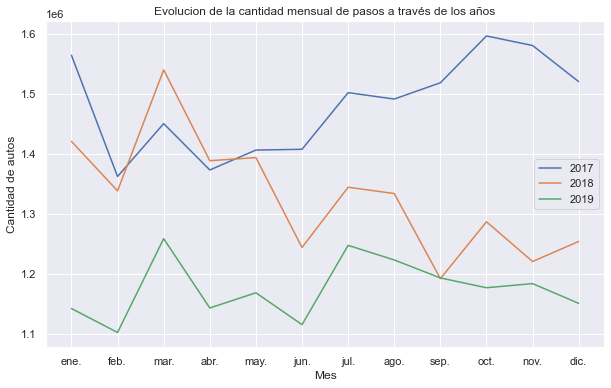

In [27]:
#Comparación de la serie en los distintos años

#Agregamos el mes del año, en formato string, a nuestro dataset:
mensual['mes'] =  mensual.index.strftime('%b')

#Graficamos:
plt.figure(figsize = (10,6))
plt.plot(mensual.mes.iloc[:12].values, 'cantidad_pasos', data=mensual.iloc[:12], label = '2017')
plt.plot(mensual.mes.iloc[12:24].values, 'cantidad_pasos', data=mensual.iloc[12:24], label = '2018')
plt.plot(mensual.mes.iloc[24:36].values, 'cantidad_pasos', data=mensual.iloc[24:36], label = '2019')
plt.xlabel('Mes')
plt.ylabel('Cantidad de autos')
plt.legend(loc= 'best', frameon = True);
plt.title('Evolucion de la cantidad mensual de pasos a través de los años');

Como se pueden observar en los dos últimos gráficos, existiría una tendencia negativa o descendente en la cantidad de autos que frecuentan la estación de peaje abonando en efectivo. Otro aspecto a tener en cuenta es que se observa una comportamiento que se repite a través de los años (o estacionalidad): la cantidad de autos disminuye en febero (al final de las vacaciones de verano), luego incrementa en marzo (al comienzo del ciclo escolar), luego empieza a descender levemente, hasta que en el mes de julio vuelve a incrementar.

## Descomposición de la serie en sus componentes (Tendencia, Estacionalidad y Ruido):

A continuación comprobaremos la **tendencia** de la serie aplcando la técnica de **media móvil o rolling window**, luego la técnica de **regresión lineal**, obtendremos el resto de los componentes de la serie (estacionalidad y ruido) manualmente, y por último descompondremos a la serie en sus componentes a través de la librería de Statmodels:

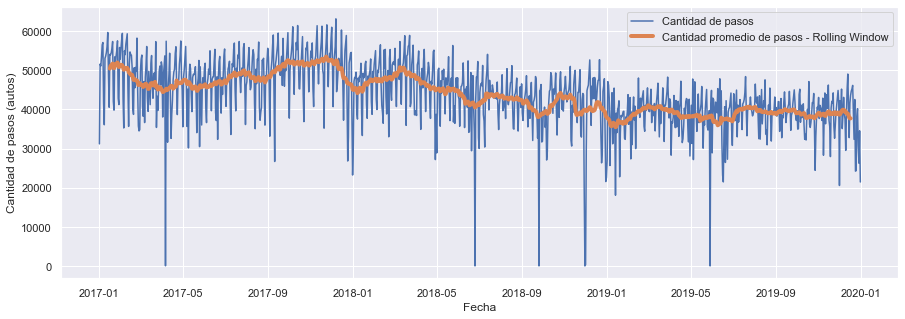

In [28]:
#Establecemos una ventana temporal mensual sobre la que se calculará la cantidad de pasos promedio y aplicamos rolling window:

ventana = 30 #Ventana de 30 días (un mes)
diario_promedio_tendencia = diario['cantidad_pasos'].rolling(window=ventana, center = True).mean()

#Graficamos:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad de pasos')
plt.plot(diario_promedio_tendencia, lw = 4, label = 'Cantidad promedio de pasos - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos (autos)')
plt.legend()
plt.show()

Al aplicar la técnica de la media móvil sobre el dataset diario, también se observa una tendencia negativa en nuestra serie.

A continuación aplicaremos el método de **regresión lineal** para encontrar la tendencia, esto es, ajustaremos una regresión lineal a la serie y analizaremos sus resultados:

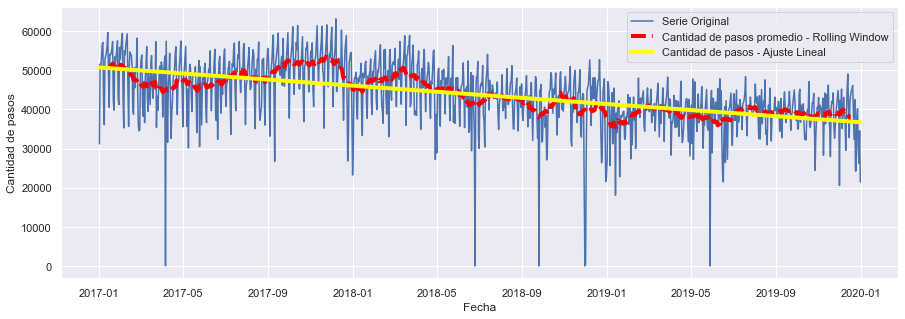

In [29]:
#Agregamos la columna de fechas en valores, que luego utilizaremos para entrenar el modelo:
diario['fecha_numeros'] = diario.index.map(datetime.datetime.toordinal)

#Importamos e instanciamos el modelo de regresión lineal:
from sklearn.linear_model import LinearRegression
reg_lineal = LinearRegression()

#Entrenamos el modelo y predecimos:
reg_lineal.fit(diario.fecha_numeros.values.reshape(-1, 1), diario.cantidad_pasos)
pred = reg_lineal.predict(diario.fecha_numeros.values.reshape(-1, 1))

#Analizamos gráficamente:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Serie Original')
plt.plot(diario_promedio_tendencia, ls = '--', lw = 4, label = 'Cantidad de pasos promedio - Rolling Window', color = 'red')
plt.plot(diario.index, pred, lw = 4, label = 'Cantidad de pasos - Ajuste Lineal', color = 'yellow')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

La técnica de regresión lineal nos da como resultado una recta con pendiente negativa, lo que también nos indica una tendencia descendente en la cantidad de autos que cruzan la estación de peaje abonando en efectivo.

A continuación obtenemos los otros componentes de la serie manualmente:

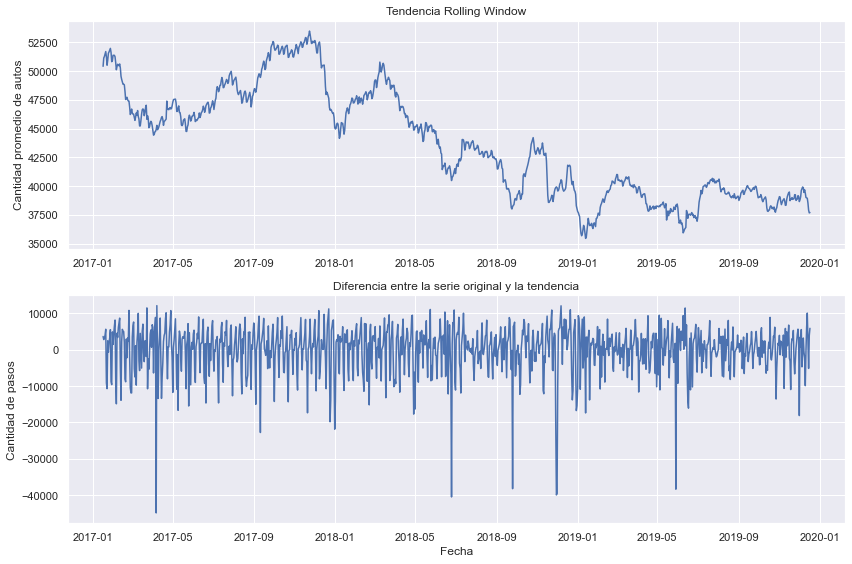

In [30]:
plt.figure(figsize = (12,8))

plt.subplot(2,1,1)
plt.title('Tendencia Rolling Window')
plt.plot(diario_promedio_tendencia)
plt.ylabel('Cantidad promedio de autos')

plt.subplot(2,1,2)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(diario.index, diario.cantidad_pasos - diario_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')

plt.tight_layout()
plt.savefig('Descomposicion manual de la serie diaria.jpg')
plt.show()

La diferencia entre la serie orginal y la tendencia rolling window está compuesta por factores de estacionalidad y ruido, pero para poder observarlos claramente utilizaremos las herramientas que nos brinda la librería **statmodels**, que nos permite descomponer la serie en sus componentes:

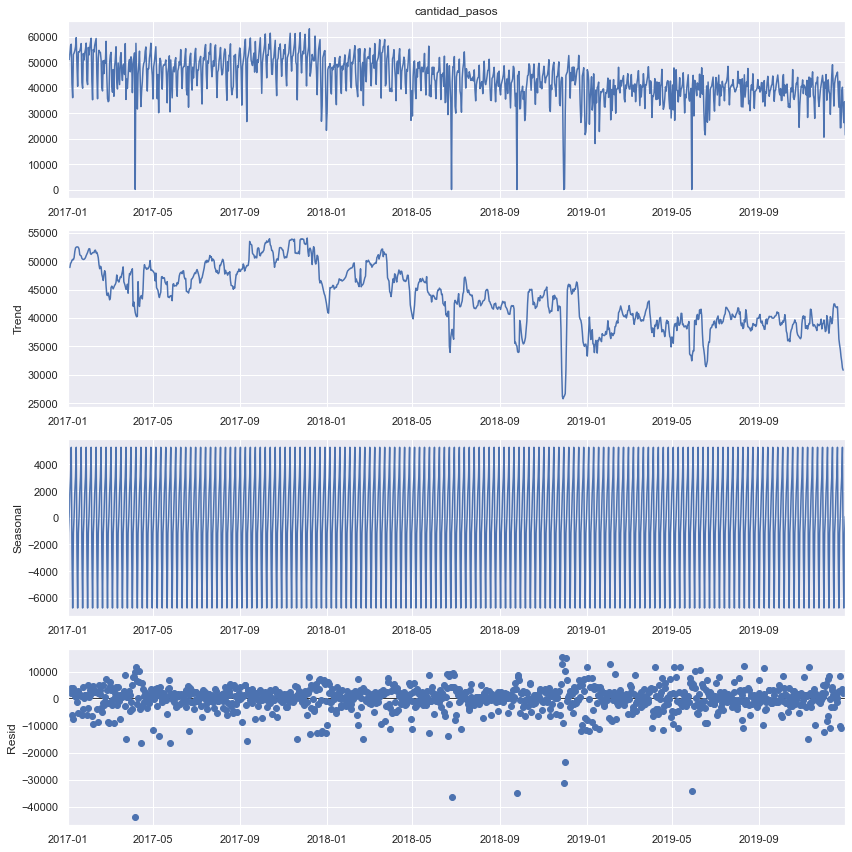

In [31]:
#Importamos el modulo de la librería y graficamos:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diario.cantidad_pasos, model='additive')
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.savefig('Serie Diaria statmodels')
plt.show()

Realizamos la misma descomposición para las **series semanales y mensuales**:

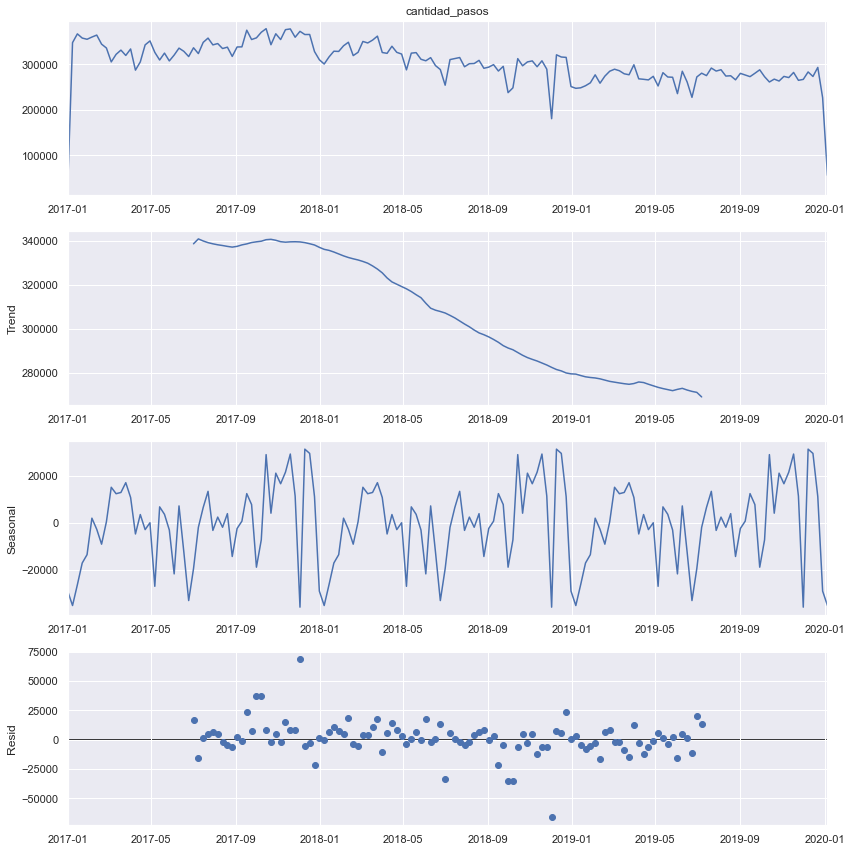

In [32]:
#Descomponemos la serie SEMANAL:
result2 = seasonal_decompose(semanal.cantidad_pasos, model='additive')
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result2.plot()
plt.savefig('Serie Semanal statmodels')
plt.show()

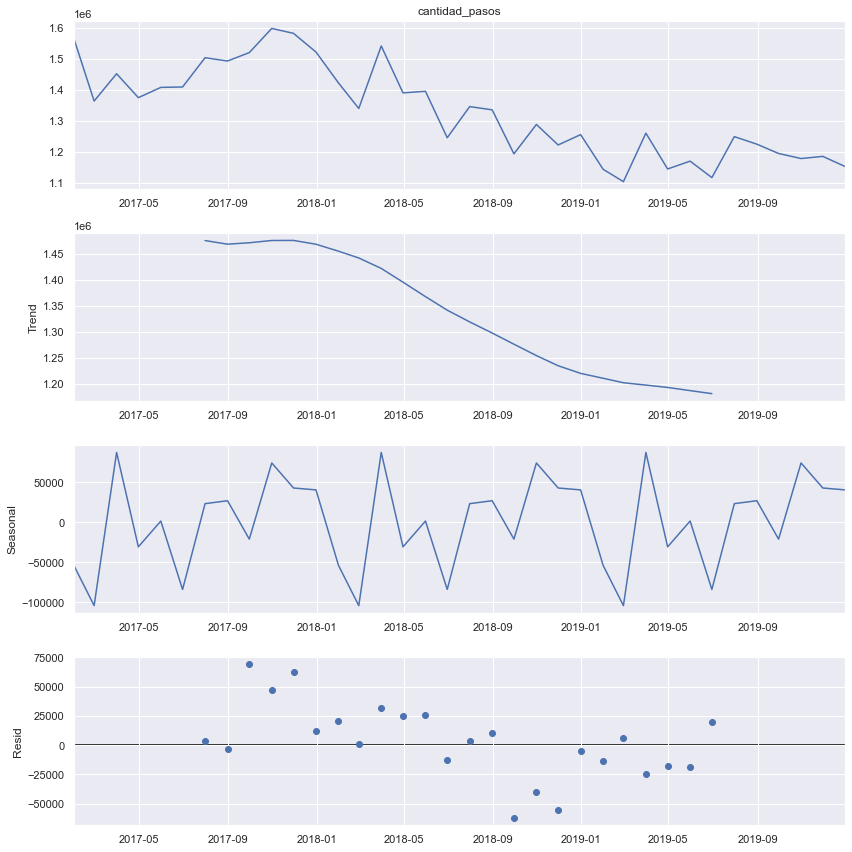

In [33]:
#Descomponemos la serie MENSUAL:
result3 = seasonal_decompose(mensual.cantidad_pasos, model='additive')
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result3.plot()
plt.savefig('Serie Mensual statmodels')
plt.show()

Al analizar nuestra serie a nivel mensual es cuando más claro se observa la **tendencia negativa** de la serie y el comportamiento repetitivo o estacional de la misma, el cual muestra una caída en el tráfico vehicular en los meses de vacaciones escolares.

Recordemos que la información que estamos analizando es para el método de pago **"Efectivo"** de la estación, por lo que resultaría interesante analizar si la tendencia negativa de nuestra serie tiene como contrapartida un crecimiento en las otras formas de pago de la estación o si simplemente disminuyo la cantidad de vehículos que atraviesa la misma (menor utilización de la autopista):

In [34]:
#Volvemos a crear un dataset uniendo la información de los diferentes años:
dataset2 = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia:
mask = dataset2.estacion == 'Illia'
dataset2 = dataset2[mask]

#Quitamos las columnas que no vamos a utilizar:
dataset2.drop(columns = ['periodo','hora_inicio','estacion'], inplace = True)

#Hacemos las transformaciones necesarias para llevar a formato fecha:
dataset2['fecha2'] = pd.to_datetime(dataset2.fecha) + pd.to_timedelta(dataset2.hora_fin, unit = 'h')
dataset2.drop(columns=['fecha','hora_fin'], inplace = True)
dataset2.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset2.sort_values('fecha', inplace = True)
dataset2.reset_index(drop=True, inplace = True)
dataset2.head()

dia    sentido tipo_vehiculo forma_pago  cantidad_pasos      fecha
0  Domingo     Centro       Liviano   TELEPASE             459 2017-01-01
1  Domingo  Provincia        Pesado   TELEPASE               3 2017-01-01
2  Domingo  Provincia        Pesado   EFECTIVO               1 2017-01-01
3  Domingo  Provincia        Pesado   TELEPASE               7 2017-01-01
4  Domingo  Provincia        Pesado   EFECTIVO               6 2017-01-01

In [35]:
#Resampleamos nuestros datos para agrupar por dia:
diario2 = dataset2.resample('D', on = 'fecha').sum()
print(diario2.shape)
diario2.head()

(1095, 1)


cantidad_pasos
fecha                     
2017-01-01           45478
2017-01-02           89289
2017-01-03           92602
2017-01-04           95813
2017-01-05          100044

Una vez que tenemos la información de la estación que incluye la cantidad de autos que la atraviesan por día sin importar la forma de pago utilizada, obtendremos la tendencia de la misma, ajustandole una regresión lineal:

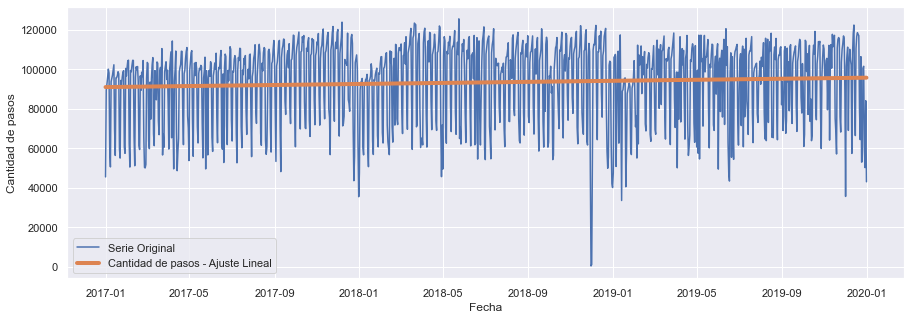

In [36]:
#Agregamos la columna de fechas en valores, que luego utilizaremos para entrenar el modelo:
diario2['fecha_numeros']=diario2.index.map(datetime.datetime.toordinal)

#Importamos e instanciamos el modelo de regresión lineal:
from sklearn.linear_model import LinearRegression
reg_lineal2 = LinearRegression()

#Entrenamos el modelo y predecimos:
reg_lineal2.fit(diario2.fecha_numeros.values.reshape(-1, 1), diario2.cantidad_pasos)
pred2 = reg_lineal2.predict(diario2.fecha_numeros.values.reshape(-1, 1))

#Analizamos gráficamente:
plt.figure(figsize = (15,5))
plt.plot(diario2.index, diario2.cantidad_pasos, label = 'Serie Original')
plt.plot(diario2.index, pred2, lw = 4, label = 'Cantidad de pasos - Ajuste Lineal')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

La figura anterior nos muestra que la serie original tiene una **tendencia estacionaria en la media**, por lo que el decrecimiento en la serie de la forma de pago "Efectivo" puede estar originado por otro factor, como por ejemplo el cambio a otra modalidad de pago. Para comprobar esto, deberíamos hacer una serie distinta para cada una de las distintas formas de pago que queremos comparar, por lo que sólo realizaremos la comparación con la segunda forma de pago más utilizada:

In [37]:
dataset2['forma_pago'].value_counts()

EFECTIVO                238869
TELEPASE                204612
EXENTO                  105903
INFRACCION               78000
NO COBRADO               66679
TARJETA DISCAPACIDAD     41336
T. DISCAPACIDAD          17139
MONEDERO                    14
Name: forma_pago, dtype: int64

Tal cual nos muestran estos resultados, la **segunda forma de pago** más utilizada es **"Telepase"**, por lo que también analizaremos la tendencia de dicha seria ajustandole una función lineal:

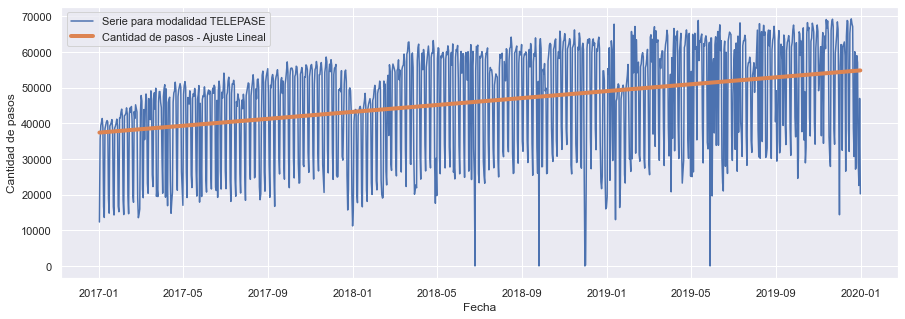

In [38]:
#Filtramos la segunda forma de pago más utilizada en el dataset:
dataset2 = dataset2[dataset2.forma_pago == 'TELEPASE']

#Resampleamos nuestros datos para agrupar por dia:
diario2 = dataset2.resample('D', on = 'fecha').sum()

#Agregamos la columna de fechas en valores, que luego utilizaremos para entrenar el modelo:
diario2['fecha_numeros']=diario2.index.map(datetime.datetime.toordinal)

#Importamos e instanciamos el modelo de regresión lineal:
from sklearn.linear_model import LinearRegression
reg_lineal2 = LinearRegression()

#Entrenamos el modelo y predecimos:
reg_lineal2.fit(diario2.fecha_numeros.values.reshape(-1, 1), diario2.cantidad_pasos)
pred2 = reg_lineal2.predict(diario2.fecha_numeros.values.reshape(-1, 1))

#Analizamos gráficamente:
plt.figure(figsize = (15,5))
plt.plot(diario2.index, diario2.cantidad_pasos, label = 'Serie para modalidad TELEPASE')
plt.plot(diario2.index, pred2, lw = 4, label = 'Cantidad de pasos - Ajuste Lineal')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

Tal cual se puede ver en el gráfico anterior, al ajustar una regresión lineal a la serie para la forma de pago "TELEPASE", se obtiene una recta con pendiente positiva, lo que indicaría una **tendencia creciente** en la utilización de esta modalidad, y en consecuencia se podría generar una **disminución en la utilización del pago en efectivo**.

A continuación analizamos la evolución mensual de las series de tiempo para ambas formas de pago:

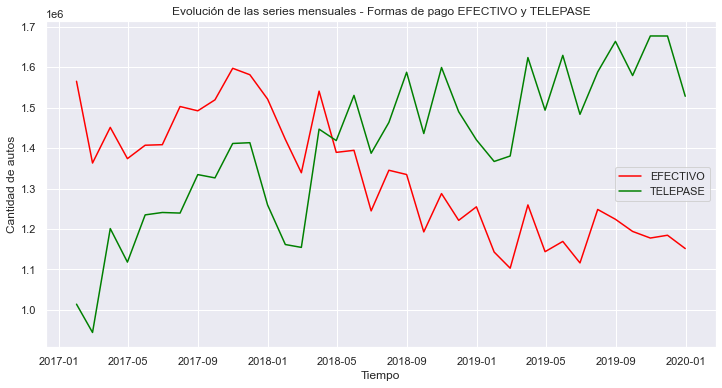

In [39]:
#Resampleamos la serie de TELEPASE a granularidad mensual:
mensual2 = dataset2.resample('M', on = 'fecha').sum()

#Graficamos la evolucion de ambas series a través de los años:
plt.figure(figsize = (12,6))
plt.plot(mensual.index, mensual.cantidad_pasos, label = 'EFECTIVO', color = 'red')
plt.plot(mensual2.index, mensual2.cantidad_pasos, label = 'TELEPASE', color = 'green')
plt.legend(loc = 'center right')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Evolución de las series mensuales - Formas de pago EFECTIVO y TELEPASE')
plt.show()

De acuerdo a lo expueso en el gráfico anterior, se puede observar que a partir de mayo de 2018 existe una migración de la forma de pago "Efectivo" a "Telepase", situación que, de acuerdo a información auxiliar, fue fomentada por el Gobierno a través de descuentos en la utilización de Telepase.

Continuando con el Análisis Exploratorio de Datos, a continuación chequearemos si existen **valores faltantes** en nuestra serie, y luego realizaremos un análisis sobre los **valores atípicos (outliers)** de la serie.

## Valores Faltantes:

Al realizar un análisis sobre los valores faltantes de nuestra serie debemos tener en cuenta que pueden existir **dos tipos de valores faltantes**: Uno corresponde a una fecha sin su valor de cantidad de pasos (autos) **- VF TIPO 1**, y el otro corresponde a una fecha que no está en la serie (no está la fecha ni la cantidad de pasos) **- VF TIPO 2**.

Por tal motivo, comprobaremos la existencia de ambos:

In [40]:
#Comprobamos la existencia de valores faltantes de TIPO 1:
print(diario.isnull().sum())

cantidad_pasos    0
dia               0
fecha_numeros     0
dtype: int64


In [41]:
##Comprobamos la existencia de valores faltantes de TIPO 2:
diario['fechas'] = diario.index
diario['fechas_check'] = diario.fechas.diff()
diario.fechas_check.value_counts()

1 days    1094
Name: fechas_check, dtype: int64

Como podemos ver, existen 1094 registros separados por un día de diferencia, por lo que podemos concluir que la serie con la que estamos trabajando **no tiene valores faltantes** de ningún tipo.

## Valores Atípicos o Outliers:

Para comenzar con el análisis de valores atípicos de nuestra serie de tiempo, deberíamos obtener, en primer lugar, los valores estadísticos del mismo:

In [42]:
diario.describe().T

count             mean              std              min  \
cantidad_pasos  1095.0     43712.859361      8192.736927              0.0   
fecha_numeros   1095.0         736877.0       316.243577         736330.0   
fechas_check      1094  1 days 00:00:00  0 days 00:00:00  1 days 00:00:00   

                            25%              50%              75%  \
cantidad_pasos          39061.5          43761.0          49498.0   
fecha_numeros          736603.5         736877.0         737150.5   
fechas_check    1 days 00:00:00  1 days 00:00:00  1 days 00:00:00   

                            max  
cantidad_pasos          63127.0  
fecha_numeros          737424.0  
fechas_check    1 days 00:00:00

De acuerdo a lo observado en la tabla anterior, la **cantidad promedio** de autos que cruzan la estación **por día** es de aproximadamente **43.700**, con una **desviación estándar** aproximada de **8.200** autos. Dado que esta última es algo elevada, si aplicáramos el criterio de las tres sigmas tendríamos límites muy amplios, por lo que considero que es mejor el criterio del rango intercuartílico para eliminar a los valores atípicos:

In [43]:
#Obtenemos los valores correspondientes al primer y tercer cuartil:
q25 = diario['cantidad_pasos'].quantile(0.25)
q75 = diario['cantidad_pasos'].quantile(0.75)

#Obtenemos el valor del rango intercuartílico:
IQR = q75 - q25

#Obtenemos los umbrales mínimos y máximos:
minimo = q25 - 1.5 * IQR
maximo = q75 + 1.5 * IQR

#Convertimos en nulos los valores por debajo del límite mínimo y los por arriba del límite máximo:
diario_depurado = diario.copy()
diario_depurado.drop(columns = ['fechas','fechas_check', 'fecha_numeros'], inplace = True)
diario_depurado.cantidad_pasos[diario_depurado.cantidad_pasos > maximo] = np.nan
diario_depurado.cantidad_pasos[diario_depurado.cantidad_pasos < minimo] = np.nan

#Reemplazamos valores nulos a través de un método de interpolación:
print(diario_depurado.isna().sum())
diario_depurado = diario_depurado.interpolate()
print(diario_depurado.isna().sum())

cantidad_pasos    16
dia                0
dtype: int64
cantidad_pasos    0
dia               0
dtype: int64


La serie original contenía 16 valores considerados atípicos, que fueron reemplazados por valores obtenidos por la función 'interpolate'. A continuación se observa gráficamente la serie antes y después del filtrado de valores atípicos realizado:

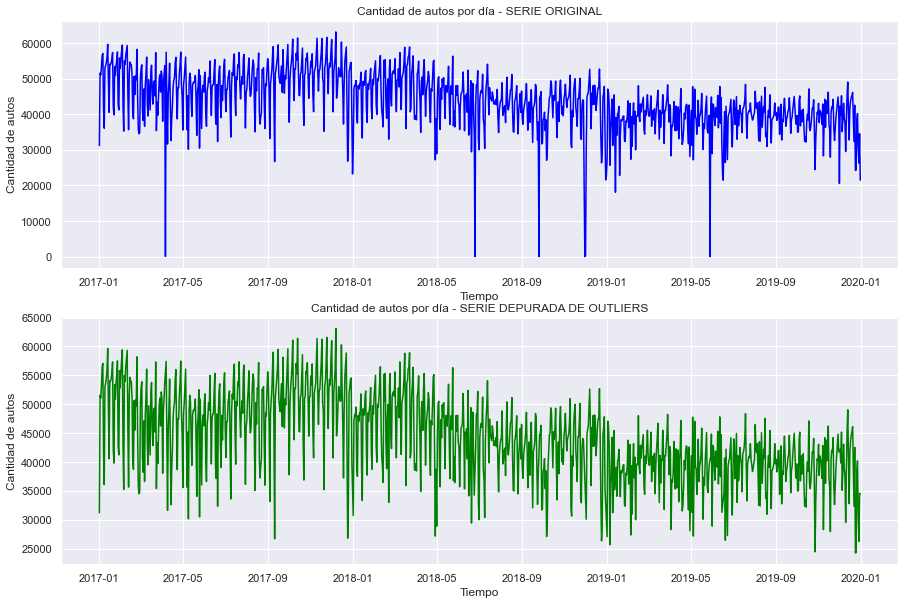

In [44]:
#Graficamos
plt.figure(figsize = (15,10))

plt.subplot(2,1,1)
plt.plot(diario.index, diario.cantidad_pasos, color='blue')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos por día - SERIE ORIGINAL')

plt.subplot(2,1,2)
plt.plot(diario_depurado.index, diario_depurado.cantidad_pasos, color='green')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos por día - SERIE DEPURADA DE OUTLIERS')
plt.savefig('Serie diaria depurada.jpg')
plt.show()

Como podemos ver en los gráficos anteriores, se consideraron como valores atípicos todos los días donde la cantidad de autos que pasaba por la estación era inferior a 25.000, y aquellos donde la cantidad era superior a 65.000.

Resampleamos la serie depurada de outliers a niveles semanal y mensual:

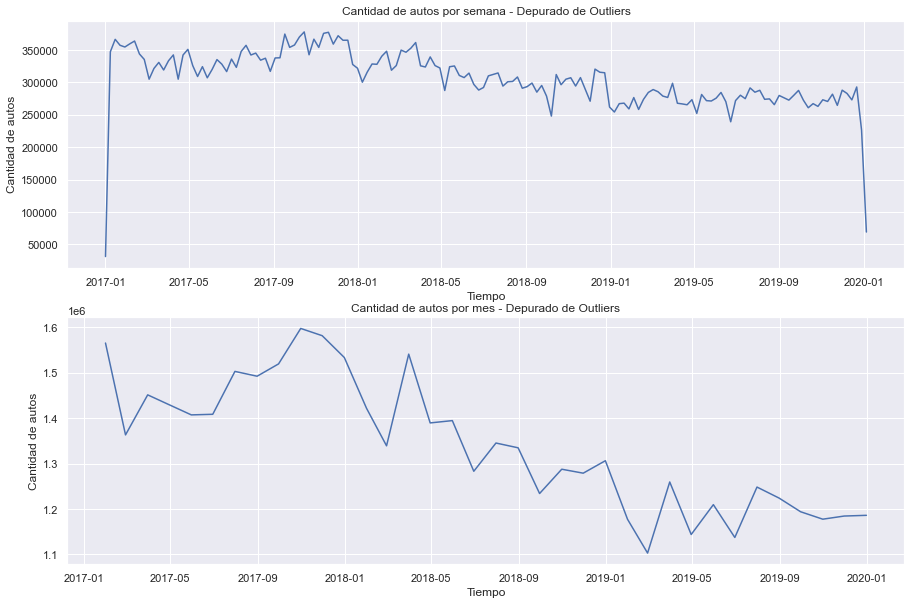

In [45]:
#Resampleamos el dataset para llevarlo a nivel semanal y mensual y observar gráficamente las series temporales:

semanal_depurado = diario_depurado.resample('W').sum()
mensual_depurado = diario_depurado.resample('M').sum()

#Graficamos
plt.figure(figsize = (15,10))

plt.subplot(2,1,1)
plt.plot(semanal_depurado.index, semanal_depurado.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos por semana - Depurado de Outliers')

plt.subplot(2,1,2)
plt.plot(mensual_depurado.index, mensual_depurado.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos por mes - Depurado de Outliers')
plt.savefig('Series semanal y mensual depuradas.jpg')
plt.show()

## Autocorrelación:

La **correlación estadística** nos muestra el nivel de correspondencia entre dos variables, mientras que la **autocorrelación en una serie de tiempo** consiste en medir la **correlación que existe entre las observaciones de la serie en distintas ventanas temporales (lags)**. En consecuencia, nos permite ver el nivel de relación (directa o indirecta) que existe entre las observaciones en distintas fechas, lo cual nos puede ser útil al momento de realizar nuestra predicción.

En este punto también realizaremos un análisis para cada una de las diferentes granularidades temporales: Diaria, Semanal y Mensual.

## Serie Diaria:

Para el caso de la serie diaria, estableceremos un número de 60 lags para realizar la comparación.

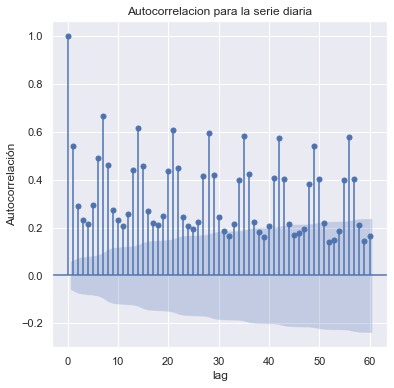

In [46]:
#Importamos el gráfico:
from statsmodels.graphics.tsaplots import plot_acf

#Graficamos la autocorrelación para la serie diaria:
matplotlib.rcParams['figure.figsize'] = [6,6]
plot_acf(diario_depurado.cantidad_pasos, lags = 60)
plt.xlabel('lag')
plt.ylabel('Autocorrelación')
plt.title('Autocorrelacion para la serie diaria')
plt.show()

Tal cual se observa en el gráfico anterior, la serie diaria presenta un **nivel más alto de autocorrelación cada 7 días**, alcanzando valores cercanos a 0.6 (correlación directa), lo que nos indica que **la cantidad de pasos por la estación de peaje** de un día determinado, **estaría directamente relacionada a la cantidad de pasos que existió el mismo día de semanas anteriores**.

## Serie Semanal:

Para el caso de la serie semanal, estableceremos un número de 26 lags (6 meses) para realizar la comparación.

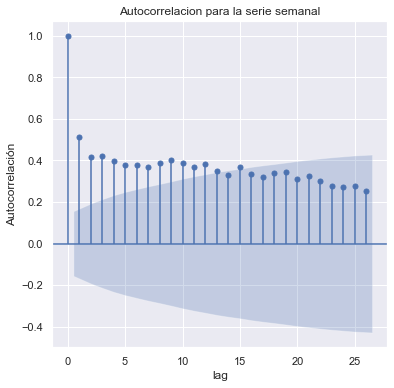

In [47]:
#Graficamos la autocorrelación para la serie semanal:
plot_acf(semanal_depurado.cantidad_pasos, lags = 26)
plt.xlabel('lag')
plt.ylabel('Autocorrelación')
plt.title('Autocorrelacion para la serie semanal')
plt.show()

En función a lo expuesto, podemos ver que en el caso de la **serie semanal** existe una menor autocorrelación que en el caso anterior, siendo **el valor de la semana inmediata anterior el más relacionado**, con una autocorrelación aproximada de 0.50.

## Serie Mensual:

Para el caso de la serie mensual, estableceremos un número de 24 lags (2 años) para realizar la comparación.

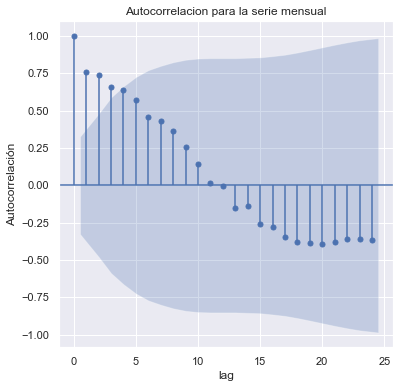

In [48]:
#Graficamos la autocorrelación para la serie mensual:
plot_acf(mensual_depurado.cantidad_pasos, lags = 24)
plt.xlabel('lag')
plt.ylabel('Autocorrelación')
plt.title('Autocorrelacion para la serie mensual')
plt.show()

Por último, al observar la serie mensual encontramos que los valores donde existe un **nivel de autocorrelación más alto** son los de los **dos meses inmediatos anteriores**, con correlaciones cercanas a 0.75, lo que implicaría una **fuerte relación directa** entre esos momentos temporales, mientras que a medida que incrementamos el valor del lag dicha correlación comienza a disminuir, volviendose negativa para lags superiores a un año.

Una vez que finalizado el Análisis Exploratorio de Datos, procedemos al siguiente paso en nuestro trabajo, que es la **predicción a futuro**.

# 3. PREDICCIÓN A FUTURO

A continuación se intentará encontrar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019.

Partiremos de un modelo Benchmark, luego se realizarán predicciones de tipo **One-Step Prediction** y **Multi-Step Prediction** aplicando técnicas de Machine Learning, y se evaluarán resultados. Todo el análisis se realizará para las distintas granularidades temporales de nuestra serie, esto es, a nivel diario, semanal y mensual, con el objetivo de encontrar el mejor modelo, es decir, con el nivel más bajo de error.

La métrica que se utilizará en primer medida para evaluar el desempeño de los modelos es el **error absoluto medio (MAE)**, que toma el promedio de las diferencias entre los valores reales y predichos, en valor absoluto. Esta es una métrica de error, por lo que a **más bajo MAE, mejor es el desempeño** de nuestro modelo.

Asimismo, dicha métrica se complementará con el **error porcentual absoluto medio (MAPE)**, que es una medida de la proporción del nivel de error sobre el promedio de cantidad de pasos en la unidad de tiempo respectiva, es decir, cuanto porcentaje representa el error el modelo sobre el promedio de valores contenidos en dicha unidad temporal.

In [49]:
#Importamos la métrica MAE para la evaluación de modelos:
from sklearn.metrics import mean_absolute_error

#Definimos una funcion que calcule y devuelva nuestras métricas:
def evaluar_modelo(y, y_pred, X_grupo, Grupo_evaluacion):
    '''Permite calcular las métricas de MAE y MAPE sobre los valores ingresados a la misma'''
    MAE = mean_absolute_error(y, y_pred)
    MAPE = MAE / X_grupo.mean() * 100
    print(f'Error en {Grupo_evaluacion}:', MAE, '- Porcentual(%):', MAPE)

## A. Modelo Benchmark

El modelo benchmark es un punto de partida, una base que nos sirve para luego comparar cuando incorporemos técnicas de Machine Learning más complejas. En nuestro caso, antes de realizar la predicción 'One-Step' consideraremos como **modelo Benchmark** a una **serie que predice** la cantidad de autos que pasan por la estación de peaje **utilizando el valor de la fecha anterior en la serie de tiempo**. Este modelo se aplicará sobre las series temporales diaria, semanal y mensual, con el objetivo de ver si se obtienen resultados diferentes.

## Serie Diaria:

En primer lugar, tenemos que dividir nuestros datos en los grupos de entrenamiento (Train) y prueba (Test), para lo cual consideraremos como prueba al último trimestre de 2019 (objetivo que queremos predecir), mientras que la diferencia de nuestra serie se repartirá entre el grupo de entrenamiento y la ventana de tiempo o número de variables que utilizaremos para predecir el valor siguiente en el modelo de 'One-Step Prediction' del apartado siguiente, también conocida como 'look back'.

In [50]:
#Definimos una ventana trimestral (90 días), sobre la cual se obtendrán los valores o atributos para realizar la predicción One-Step en el punto siguiente:
look_back = 90 

#Seleccionamos la variable que utilizaremos para alimentar nuestro modelo:
diario_pred = diario_depurado.cantidad_pasos

#Creamos las variables X e y, para rellenar luego con los valores correspondientes:
N = diario_pred.shape[0]
X = np.zeros((N - look_back,look_back))
y = np.zeros(N - look_back)

#Rellenamos los valores de X e y:
for i in range(X.shape[0]):
    X[i,:] = diario_pred.iloc[i:i+look_back]
    y[i] = diario_pred.iloc[i+look_back]
    
#Dividimos en grupos de entrenamiento y prueba:
N_test = 92 #correspondiente a los días del último trimestre del 2019
N_train = N - N_test - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_total = N_train + N_test

length_total = N_train + N_test + look_back

#Definimos el grupo de entrenamiento
X_train = X[:N_train,:]
y_train = y[:N_train]

#Definimos el grupo de prueba
X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]

Una vez definidos los grupos de entrenamiento y prueba, establecemos el **modelo Benchmark**, donde cada valor predicho coincide con el valor del día anterior, y evaluamos:

In [51]:
#Establecemos el modelo Benchmark, donde cada valor predicho coincide con el valor del día anterior en la serie:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

#Evaluamos el modelo con la función creada anteriormente:
evaluar_modelo(y_test, y_test_pred_benchmark, X_test, 'Test')

Error en Test: 4695.532608695652 - Porcentual(%): 11.975430448218507


Observamos la serie original y la serie obtenida por el modelo benchmark graficamente:

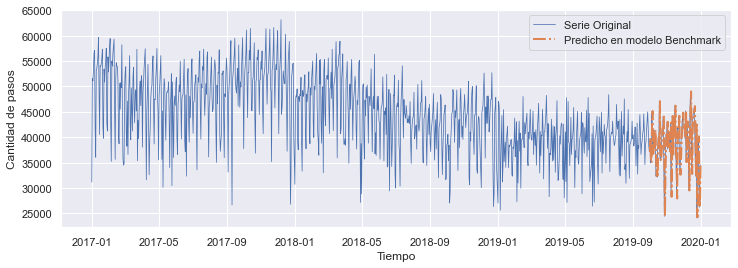

In [52]:
plt.figure(figsize=(12,4))
plt.plot(diario_pred.index[:length_total], diario_pred[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario_pred.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en modelo Benchmark')

plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

De acuerdo con lo observado en los puntos anteriores, nuestro modelo Benchmark estaría prediciendo el flujo vehicular del último trimestre del 2019 con un **MAE de 4.695,53** sobre el grupo de prueba, lo que representa casi un **12% del valor promedio de pasos por día** en la estación.

A continuación realizaremos la misma predicción para las granularidades semanal y mensual, con el objeto de ver si obtenemos resultados diferentes:

## Serie Semanal:

En el caso de la serie semanal, el modelo Benchmark es aquel en el que la cantidad de pasos (autos) predicha coincide con la cantidad de autos de la semana anterior.

En este caso debemos separar la serie también en grupos de entrenamiento y prueba, y definir el look_back:

In [53]:
#Definimos una ventana trimestral (12 semanas), sobre la cual se efectuará la predicción One-Step en el punto siguiente:
look_back1 = 12 

#Seleccionamos la variable que utilizaremos para alimentar nuestro modelo:
semanal_pred = semanal_depurado.cantidad_pasos

#Creamos las variables X e y, para rellenar luego con los valores correspondientes:
N1 = semanal_pred.shape[0]
X1 = np.zeros((N1 - look_back1,look_back1))
y1 = np.zeros(N1 - look_back1)

#Rellenamos los valores de X e y:
for i in range(X1.shape[0]):
    X1[i,:] = semanal_pred.iloc[i:i+look_back1]
    y1[i] = semanal_pred.iloc[i+look_back1]
    
#Dividimos en grupos de entrenamiento y prueba:
N_test1 = 12 #correspondiente a las semanas del último trimestre del 2019
N_train1 = N1 - N_test1 - look_back1 # cantidad de instancias que vamos a usar para entrenar. 
N_total1 = N_train1 + N_test1

length_total1 = N_train1 + N_test1 + look_back1

#Definimos el grupo de entrenamiento
X_train1 = X1[:N_train1,:]
y_train1 = y1[:N_train1]

#Definimos el grupo de prueba
X_test1 = X1[N_train1:N_train1+N_test1,:]
y_test1 = y1[N_train1:N_train1+N_test1]

#Definimos el modelo benchmark, donde cada valor predicho coincide con el de la semana anterior:
y_test_pred_benchmark1 = y1[-1 + N_train1:N_train1+N_test1 - 1]

#Evaluamos el modelo sobre el grupo de prueba:
evaluar_modelo(y_test1, y_test_pred_benchmark1, X_test1, 'Test')

Error en Test: 27838.083333333332 - Porcentual(%): 10.18046558006962


Observamos los resultados obtenidos gráficamente:

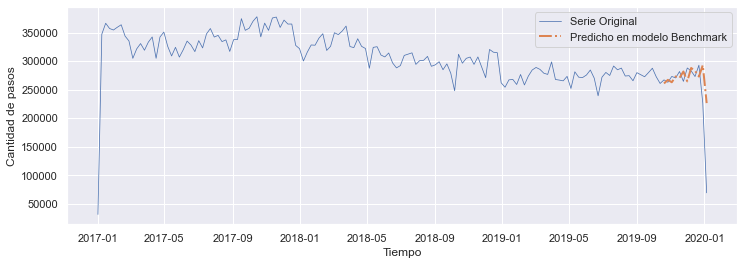

In [54]:
plt.figure(figsize=(12,4))
plt.plot(semanal_pred.index[:length_total1], semanal_pred[:length_total1],lw = 0.75, label = 'Serie Original')
plt.plot(semanal_pred.index[N_train1+look_back1: length_total1], y_test_pred_benchmark1,'-.', lw = 2, label = 'Predicho en modelo Benchmark')

plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

Los resultados obtenidos demuestran que al utilizar una granularidad semanal, el desempeño del modelo benchmark empeora notablemente, **incrementando el MAE por arriba de 27.800**. Si analizamos el **MAPE** en cambio, observamos que el mismo **disminuye** respecto del punto anterior, posicionandose cerca del **10%**, lo cual significa que a pesar de obtenerse un error mayor en valor absoluto, el mismo representa un menor porcentaje del promedio de autos que atraviesan la estación en esta granularidad temporal.

## Serie Mensual:

Por último, en el caso de la serie mensual, el modelo Benchmark es aquel en el que la cantidad de pasos (autos) predicha coincide con la cantidad de autos del mes anterior.

En este caso debemos separar la serie también en grupos de entrenamiento y prueba, y definir el look_back:

In [55]:
#Definimos una ventana de seis meses, sobre la cual se efectuará la predicción One-Step en el punto siguiente:
look_back2 = 6 

#Seleccionamos la variable que utilizaremos para alimentar nuestro modelo:
mensual_pred = mensual_depurado.cantidad_pasos

#Creamos las variables X e y, para rellenar luego con los valores correspondientes:
N2 = mensual_pred.shape[0]
X2 = np.zeros((N2 - look_back2,look_back2))
y2 = np.zeros(N2 - look_back2)

#Rellenamos los valores de X e y:
for i in range(X2.shape[0]):
    X2[i,:] = mensual_pred.iloc[i:i+look_back2]
    y2[i] = mensual_pred.iloc[i+look_back2]
    
#Dividimos en grupos de entrenamiento y prueba:
N_test2 = 3 #correspondiente al último trimestre del 2019
N_train2 = N2 - N_test2 - look_back2 # cantidad de instancias que vamos a usar para entrenar. 
N_total2 = N_train2 + N_test2

length_total2 = N_train2 + N_test2 + look_back2

#Definimos el grupo de entrenamiento
X_train2 = X2[:N_train2,:]
y_train2 = y2[:N_train2]

#Definimos el grupo de prueba
X_test2 = X2[N_train2:N_train2+N_test2,:]
y_test2 = y2[N_train2:N_train2+N_test2]

#Definimos el modelo benchmark, donde cada valor predicho coincide con el de la semana anterior:
y_test_pred_benchmark2 = y2[-1 + N_train2:N_train2+N_test2 - 1]

#Evaluamos el modelo sobre el grupo de prueba:
evaluar_modelo(y_test2, y_test_pred_benchmark2, X_test2, 'Test')

Error en Test: 8281.166666666666 - Porcentual(%): 0.6928503722360831


Observamos los resultados obtenidos gráficamente:

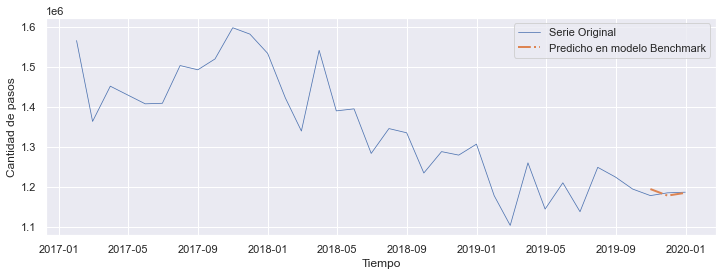

In [56]:
plt.figure(figsize=(12,4))
plt.plot(mensual_pred.index[:length_total2], mensual_pred[:length_total2],lw = 0.75, label = 'Serie Original')
plt.plot(mensual_pred.index[N_train2+look_back2: length_total2], y_test_pred_benchmark2,'-.', lw = 2, label = 'Predicho en modelo Benchmark')

plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

Como podemos ver en los resultados obtenidos, el modelo mensual mejoró su desempeño respecto al modelo semanal, obteniendo un **MAE de aproximadamente 8.300 pasos**, que representan un **2,5% de la cantidad promedio** de autos que pasan por mes por la estación. Este buen resultado puede estar dado por la **fuerte autocorrelación** que demostraba la serie mensual con los meses inmediatos anteriores.

A continuación realizaremos la predicción en las mismas tres granularidades temporales aplicando Machine Learning, a través de la técnica conocida como **One-Step Prediction**.

## B. One-Step Prediction:

La técnica de One-Step prediction consiste en aplicar un modelo de Machine Learning que prediga el siguiente valor en la serie de tiempo, utilizando como variables o features para su predicción, a los valores de la misma serie pero en una ventana de tiempo anterior ('look back').

En nuestro caso, las ventanas de tiempo seleccionadas fueron: **90 días** para la serie **diaria**, **12 semanas** para la serie **semanal**, y **seis meses** para la serie **mensual**.

El modelo que utilizaremos para realizar la predicción es el Random Forest Regressor, el cual entrenaremos, en primer lugar, con 100 árboles de decisión, y luego optimizaremos sus hiperparámetros con el objetivo de encontrar mejores resultados.

## Serie Diaria:

In [57]:
#Importamos e instanciamos el modelo:
from sklearn.ensemble import RandomForestRegressor

random_forest_diario = RandomForestRegressor(n_estimators=100, criterion = 'mae', random_state=42, n_jobs=-1)

#Entrenamos el modelo con los datos de entrenamiento de nuestra serie diaria:
random_forest_diario.fit(X_train,y_train)

#Predecimos sobre los grupos de entrenamiento y prueba:
y_train_pred = random_forest_diario.predict(X_train)
y_test_pred = random_forest_diario.predict(X_test)

#Evaluamos el desempeño del modelo en ambos grupos:
evaluar_modelo(y_train, y_train_pred, X_train, 'Train')
evaluar_modelo(y_test, y_test_pred, X_test, 'Test')

Error en Train: 1234.481827309237 - Porcentual(%): 2.770166889472706
Error en Test: 3537.3348731884053 - Porcentual(%): 9.02157673603993


Atendiendo a los resultados obtenidos, se puede decir que la predicción One-Step obtuvo un mejor desempeño que el modelo benchmark, ya que redujo el **MAE** sobre el grupo de prueba a un valor cercano a **3.500**, que representan el **9% del total de pasos promedio por día** de la estación.

Por otro lado, resulta importante destacar el bajo nivel de error sobre el **grupo de entrenamiento**, que tiene un **MAE** de sólo **1.200**, que representan casi el **2,8% del promedio de autos por día**, lo que nos podría estar indicando también que el modelo podría estar sobreajustando sobre estos datos.

A continuación observamos los resultados de la predicción gráficamente:

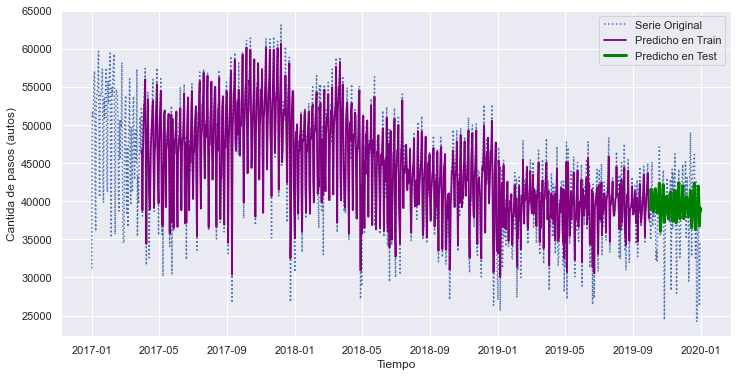

In [58]:
plt.figure(figsize=(12,6))
plt.plot(diario_pred.index[:length_total], diario_pred[:length_total],':', lw = 1.5, label = 'Serie Original')
plt.plot(diario_pred.index[look_back: look_back + N_train], y_train_pred,'-',lw = 1.8, label = 'Predicho en Train', color='purple')
plt.plot(diario_pred.index[N_train+look_back: length_total], y_test_pred,'-', lw = 3, label = 'Predicho en Test', color = 'green')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantida de pasos (autos)')
plt.show()

A continuación analizaremos cuáles variables está considerando el modelo como más importantes a la hora de realizar la predicción:

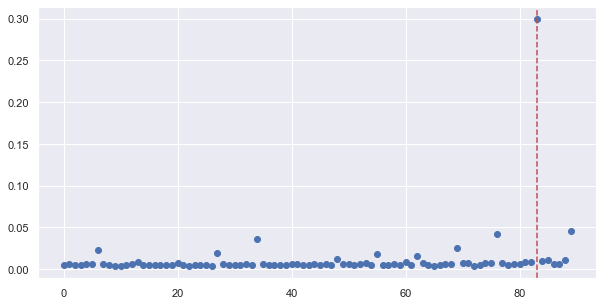

In [59]:
plt.figure(figsize = (10,5))
plt.scatter(np.arange(random_forest_diario.feature_importances_.size),random_forest_diario.feature_importances_)
plt.axvline(look_back - 7, linestyle ='--', color= 'r')
plt.show()

Si analizamos el gráfico anterior de derecha a izquierda, podemos ver que el **atributo con mayor importancia** en la predicción, es el valor que se encuentra 7 posiciones anteriores al último valor del gráfico, es decir, la **cantidad de pasos que hubo en la estación el mismo día, pero de la semana anterior**. Asimismo, podemos ver que el resto de los atributos que le siguen en importancia para la predicción se encuentran separados entre sí cada 7 días también, por lo cual se estaría usando el mismo día de semanas anteriores, lo cual reafirma lo que observábamos en el gráfico de autocorrelación anteriormente.

A continuación optimizaremos los hiperparámetros del modelo a través de la técnica de Random Search:

In [60]:
# #Definimos los valores de los hiperparámetros que queremos comparar:

# parametros = {'n_estimators': list(np.arange(50,325,25)), #cantidad de árboles
#               'max_depth': list(np.arange(1,20)),         #profundidad del árbol
#               'min_samples_split': list(np.arange(2,10)),
#               'min_samples_leaf': list(np.arange(1,5)),
#               'max_features':['auto', 'sqrt', 'log2']}

# #Importamos el modelo:
# from sklearn.model_selection import RandomizedSearchCV

# #Creamos el modelo aplicando validación cruzada en 5 pliegues y 250 iteraciones:
# random_search = RandomizedSearchCV(random_forest_diario, n_iter=250, param_distributions = parametros, cv=5, scoring='neg_mean_absolute_error')

# # Entrenamos el modelo sobre los datos de entrenamiento:
# random_search.fit(X_train, y_train)

# #Obtenemos los mejores parámetros y el mejor score o desempeño del modelo:
# print("Mejores parametros: "+str(random_search.best_params_))
# print("Mejor Score: "+str(random_search.best_score_)+'\n')

Aplicamos los parámetros obtenidos en el Random Search y evaluamos:

In [61]:
#creamos el modelo incluyendo los parámetros encontrados por el Random Search:
random_forest_diario2 = RandomForestRegressor(n_estimators=75,min_samples_split = 9, min_samples_leaf= 4,max_features= 'sqrt', max_depth= 10, criterion = 'mae', random_state=42, n_jobs=-1)

#Entrenamos el modelo con los datos de entrenamiento de nuestra serie diaria:
random_forest_diario2.fit(X_train,y_train)

#Predecimos sobre los grupos de entrenamiento y prueba:
y_train_pred = random_forest_diario2.predict(X_train)
y_test_pred = random_forest_diario2.predict(X_test)

#Evaluamos el desempeño del modelo en ambos grupos:
evaluar_modelo(y_train, y_train_pred, X_train, 'Train')
evaluar_modelo(y_test, y_test_pred, X_test, 'Test')

Error en Train: 2360.6421680662042 - Porcentual(%): 5.297261269632244
Error en Test: 3583.0958756038644 - Porcentual(%): 9.138285051652996


Como vemos el modelo con mejores parámetros encontrado por el Random Search obtiene un valor de MAE sobre el grupo de entrenamiento de 3.400 aproximadamente. Al incorporar los valores de los parámetros encontrados por el Random Search en nuestro modelo, obtenemos un MAE aproximado de 3.600 sobre el grupo de prueba, el cual es superior al que obtenía el modelo original, como también un mayor error para el grupo de entrenamiento (aumentando el sesgo y reduciendo levemente la varianza), por lo cual considero que no es necesario efectuar un cambio sobre los hiperparámetros originales.


Como el modelo de predicción One-Step consiste en predecir el siguiente valor en la serie de tiempo, tomando como atributos o features valores que haya asumido la misma serie en una ventana de tiempo anterior o look_back, el tamaño de ésta última se convierte otro parámetro sobre el que podríamos realizar una optimización, que realizaremos a continuación:

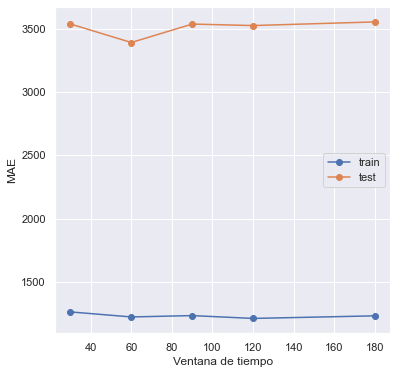

In [62]:
#Optimización manual de la ventana de tiempo o look_back:

# Definimos las listas vacias para los valores de MSE deseados:
lista_MAE_train_diario = []
lista_MAE_test_diario = []

# Definimos la lista de valores de 'look_back' que vamos a explorar:
look_backs_diarios = [30,60,90,120,180]

# Generamos un loop sobre los distintos valores de 'look_back':
for look_back_diario in look_backs_diarios:
    
    look_back_diario = look_back_diario 

    #Creamos las variables X e y, para rellenar luego con los valores correspondientes:
    N_diario = diario_pred.shape[0]
    X_diario = np.zeros((N_diario - look_back_diario,look_back_diario))
    y_diario = np.zeros(N_diario - look_back_diario)

    #Rellenamos los valores de X e y:
    for i in range(X_diario.shape[0]):
        X_diario[i,:] = diario_pred.iloc[i:i+look_back_diario]
        y_diario[i] = diario_pred.iloc[i+look_back_diario]

    #Dividimos en grupos de entrenamiento y prueba:
    N_test_diario = 92 #correspondiente a los días del último trimestre del 2019
    N_train_diario = N_diario - N_test_diario - look_back_diario # cantidad de instancias que vamos a usar para entrenar. 
    N_total_diario = N_train_diario + N_test_diario

    length_total_diario = N_train_diario + N_test_diario + look_back_diario

    #Definimos el grupo de entrenamiento
    X_train_diario = X_diario[:N_train_diario,:]
    y_train_diario = y_diario[:N_train_diario]

    #Definimos el grupo de prueba
    X_test_diario = X_diario[N_train_diario:N_train_diario+N_test_diario,:]
    y_test_diario = y_diario[N_train_diario:N_train_diario+N_test_diario]
            
    # Definir el modelo con el valor de profundidad
    rf_diario = RandomForestRegressor(n_estimators=100, criterion = 'mae', random_state=42)
    
    # Entrenar el modelo
    rf_diario.fit(X_train_diario,y_train_diario)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred_diario = rf_diario.predict(X_train_diario)
    train_MAE_diario = mean_absolute_error(y_train_diario, y_train_pred_diario)
   
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_diario = rf_diario.predict(X_test_diario)
    test_MAE_diario = mean_absolute_error(y_test_diario, y_test_pred_diario)
    
    # Agregar la información a las listas
    lista_MAE_train_diario.append(train_MAE_diario)
    lista_MAE_test_diario.append(test_MAE_diario)
    
#Luego analizamos el desempeño del modelo para los distintos valores de look_back gráficamente:
matplotlib.rcParams['figure.figsize'] = [6,6]
plt.plot(look_backs_diarios,lista_MAE_train_diario,'o-',label='train')
plt.plot(look_backs_diarios,lista_MAE_test_diario,'o-',label='test')
plt.legend()
plt.xlabel('Ventana de tiempo');
plt.ylabel('MAE');

De acuerdo a lo observado en este último gráfico, con una ventana (o **look_back**) de **60 días** es cuando se obtiene un **nivel más bajo de error** en el grupo de prueba, por lo que a continuación evaluaremos nuevamente el modelo utilizando dicha ventana temporal:

In [63]:
#Definimos una ventana de 60 días, sobre la cual se obtendrán los valores o atributos para realizar la predicción One-Step:
look_back = 60 

#Seleccionamos la variable que utilizaremos para alimentar nuestro modelo:
diario_pred = diario_depurado.cantidad_pasos

#Creamos las variables X e y, para rellenar luego con los valores correspondientes:
N = diario_pred.shape[0]
X = np.zeros((N - look_back,look_back))
y = np.zeros(N - look_back)

#Rellenamos los valores de X e y:
for i in range(X.shape[0]):
    X[i,:] = diario_pred.iloc[i:i+look_back]
    y[i] = diario_pred.iloc[i+look_back]
    
#Dividimos en grupos de entrenamiento y prueba:
N_test = 92 #correspondiente a los días del último trimestre del 2019
N_train = N - N_test - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_total = N_train + N_test

length_total = N_train + N_test + look_back

#Definimos el grupo de entrenamiento
X_train = X[:N_train,:]
y_train = y[:N_train]

#Definimos el grupo de prueba
X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]

#Entrenamos el modelo con los datos de entrenamiento de nuestra serie diaria:
random_forest_diario.fit(X_train,y_train)

#Predecimos sobre los grupos de entrenamiento y prueba:
y_train_pred = random_forest_diario.predict(X_train)
y_test_pred = random_forest_diario.predict(X_test)

#Evaluamos el desempeño del modelo en ambos grupos:
evaluar_modelo(y_train, y_train_pred, X_train, 'Train')
evaluar_modelo(y_test, y_test_pred, X_test, 'Test')

Error en Train: 1223.8155585012373 - Porcentual(%): 2.747400981036016
Error en Test: 3391.645226449276 - Porcentual(%): 8.68098621597476


Tal cual se observa en los resultados obtenidos, al reducir la ventana de tiempo a 60 días, se redujo también el MAE sobre el grupo de prueba, alcanzando un valor de **3.391,65**, que representa el **8.7 % de la cantidad de autos promedio diaria**.

Observamos los resultados de la última predicción gráficamente:

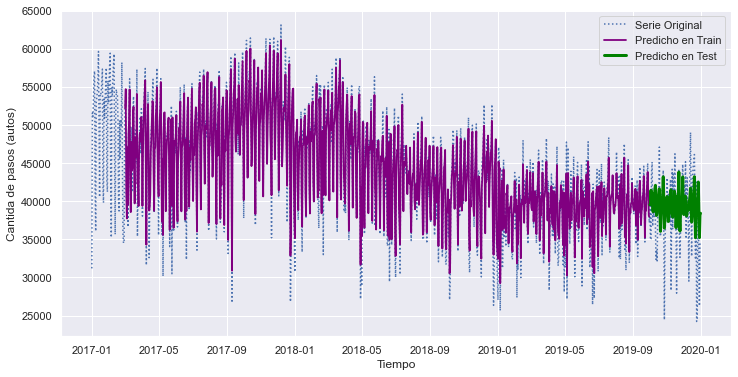

In [64]:
plt.figure(figsize=(12,6))
plt.plot(diario_pred.index[:length_total], diario_pred[:length_total],':', lw = 1.5, label = 'Serie Original')
plt.plot(diario_pred.index[look_back: look_back + N_train], y_train_pred,'-',lw = 1.8, label = 'Predicho en Train', color='purple')
plt.plot(diario_pred.index[N_train+look_back: length_total], y_test_pred,'-', lw = 3, label = 'Predicho en Test', color = 'green')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantida de pasos (autos)')
plt.show()

## Serie Semanal:

In [65]:
#Instanciamos el modelo:
random_forest_semanal = RandomForestRegressor(n_estimators=100, criterion = 'mae', random_state=42)

#Entrenamos el modelo con los datos de entrenamiento de nuestra serie diaria:
random_forest_semanal.fit(X_train1,y_train1)

#Predecimos sobre los grupos de entrenamiento y prueba:
y_train_pred1 = random_forest_semanal.predict(X_train1)
y_test_pred1 = random_forest_semanal.predict(X_test1)

#Evaluamos el desempeño del modelo en ambos grupos:
evaluar_modelo(y_train1, y_train_pred1, X_train1, 'Train')
evaluar_modelo(y_test1, y_test_pred1, X_test1, 'Test')

Error en Train: 5194.041256218906 - Porcentual(%): 1.6662848517913904
Error en Test: 28831.475138888887 - Porcentual(%): 10.543751764785938


De acuerdo a los resultados obtenidos, se observa que al utilizar la **granularidad semanal**, el **MAE incrementa aproximadamente a 28.800**, lo que representa un **10,50 %** del **promedio de autos que atraviesa la estación de peaje semanalmente**.

Observamos la predicción realizada gráficamente:

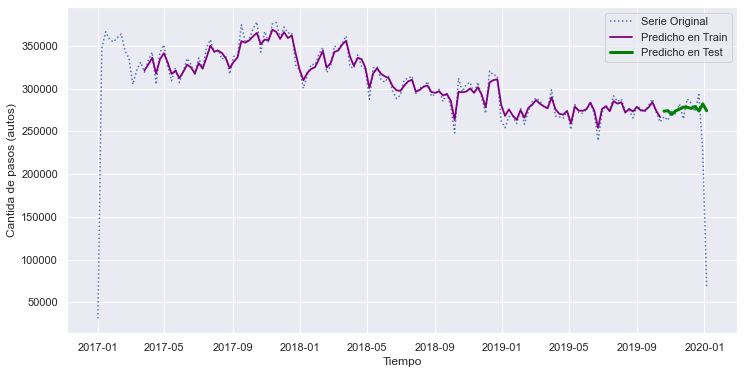

In [66]:
plt.figure(figsize=(12,6))
plt.plot(semanal_pred.index[:length_total1], semanal_pred[:length_total1],':', lw = 1.5, label = 'Serie Original')
plt.plot(semanal_pred.index[look_back1: look_back1 + N_train1], y_train_pred1,'-',lw = 1.8, label = 'Predicho en Train', color='purple')
plt.plot(semanal_pred.index[N_train1+look_back1: length_total1], y_test_pred1,'-', lw = 3, label = 'Predicho en Test', color = 'green')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantida de pasos (autos)')
plt.show()

Analizamos las variables que el modelo está considerando como importantes para la predicción:

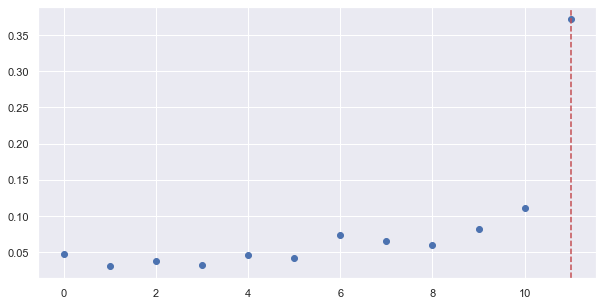

In [67]:
plt.figure(figsize = (10,5))
plt.scatter(np.arange(random_forest_semanal.feature_importances_.size),random_forest_semanal.feature_importances_)
plt.axvline(look_back1 - 1, linestyle ='--', color= 'r')
plt.show()

Tal cual nos muestran los gráficos anteriores, la predicción a nivel semanal tiene un desempeño bastante bueno sobre los datos de entrenamiento, pero empeora al predecir sobre los datos de prueba, siendo la cantidad de autos de la semana anterior el valor más importante para realizar la predicción.

A continuación se realizará una optimización manual sobre las ventanas de tiempo utilizadas con el objeto de encontrar un mejor resultado:

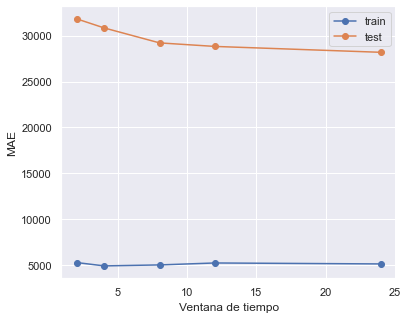

In [68]:
#Optimización manual de la ventana de tiempo o look_back:

# Definimos las listas vacias para los valores de MSE deseados:
lista_MAE_train_semanal = []
lista_MAE_test_semanal = []

# Definimos la lista de valores de 'look_back' que vamos a explorar:
look_backs_semanales = [2,4,8,12,24]

# Generamos un loop sobre los distintos valores de 'look_back':
for look_back_semanal in look_backs_semanales:
    
    look_back_semanal = look_back_semanal 

    #Creamos las variables X e y, para rellenar luego con los valores correspondientes:
    N_semanal = semanal_pred.shape[0]
    X_semanal = np.zeros((N_semanal - look_back_semanal,look_back_semanal))
    y_semanal = np.zeros(N_semanal - look_back_semanal)

    #Rellenamos los valores de X e y:
    for i in range(X_semanal.shape[0]):
        X_semanal[i,:] = semanal_pred.iloc[i:i+look_back_semanal]
        y_semanal[i] = semanal_pred.iloc[i+look_back_semanal]

    #Dividimos en grupos de entrenamiento y prueba:
    N_test_semanal =  12 #correspondiente a las semanas del último trimestre del 2019
    N_train_semanal = N_semanal - N_test_semanal - look_back_semanal # cantidad de instancias que vamos a usar para entrenar. 
    N_total_semanal = N_train_semanal + N_test_semanal

    length_total_semanal = N_train_semanal + N_test_semanal + look_back_semanal

    #Definimos el grupo de entrenamiento
    X_train_semanal = X_semanal[:N_train_semanal,:]
    y_train_semanal = y_semanal[:N_train_semanal]

    #Definimos el grupo de prueba
    X_test_semanal = X_semanal[N_train_semanal:N_train_semanal+N_test_semanal,:]
    y_test_semanal = y_semanal[N_train_semanal:N_train_semanal+N_test_semanal]
            
    # Definir el modelo con el valor de profundidad
    rf_semanal = RandomForestRegressor(n_estimators=100, criterion = 'mae', random_state=42)
    
    # Entrenar el modelo
    rf_semanal.fit(X_train_semanal,y_train_semanal)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred_semanal = rf_semanal.predict(X_train_semanal)
    train_MAE_semanal = mean_absolute_error(y_train_semanal, y_train_pred_semanal)
   
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_semanal = rf_semanal.predict(X_test_semanal)
    test_MAE_semanal = mean_absolute_error(y_test_semanal, y_test_pred_semanal)
    
    # Agregar la información a las listas
    lista_MAE_train_semanal.append(train_MAE_semanal)
    lista_MAE_test_semanal.append(test_MAE_semanal)
    
#Luego analizamos el desempeño del modelo para los distintos valores de look_back gráficamente:
matplotlib.rcParams['figure.figsize'] = [6,5]
plt.plot(look_backs_semanales,lista_MAE_train_semanal,'o-',label='train')
plt.plot(look_backs_semanales,lista_MAE_test_semanal,'o-',label='test')
plt.legend()
plt.xlabel('Ventana de tiempo');
plt.ylabel('MAE');

De acuerdo a los resultados observados, no existe una diferencia considerable en el desempeño del modelo al cambiar los valores de la ventana temporal.

## Serie Mensual:

In [69]:
#Instanciamos el modelo:
random_forest_mensual = RandomForestRegressor(n_estimators=100, criterion = 'mae', random_state=42)

#Entrenamos el modelo con los datos de entrenamiento de nuestra serie diaria:
random_forest_mensual.fit(X_train2,y_train2)

#Predecimos sobre los grupos de entrenamiento y prueba:
y_train_pred2 = random_forest_mensual.predict(X_train2)
y_test_pred2 = random_forest_mensual.predict(X_test2)

#Evaluamos el desempeño del modelo en ambos grupos:
evaluar_modelo(y_train2, y_train_pred2, X_train2, 'Train')
evaluar_modelo(y_test2, y_test_pred2, X_test2, 'Test')

Error en Train: 25096.32490740743 - Porcentual(%): 1.8390390235032381
Error en Test: 17978.06416666663 - Porcentual(%): 1.5041489866515383


Tal cual demuestran los resultados anteriores, al trabajar con la **granularidad mensual** se observa un **incremento considerable en el MAE sobre el grupo de entrenamiento**, superando al grupo de prueba con un **MAE aproximado de 25.000**, mientras que el MAE de este último alcanzó un valor casi de 18.000, que representa sólo un **1,5% del promedio mensual de autos que pasa por la estación**, por lo cual el resultado es muy bueno.

Observamos el desempeño del modelo gráficamente:

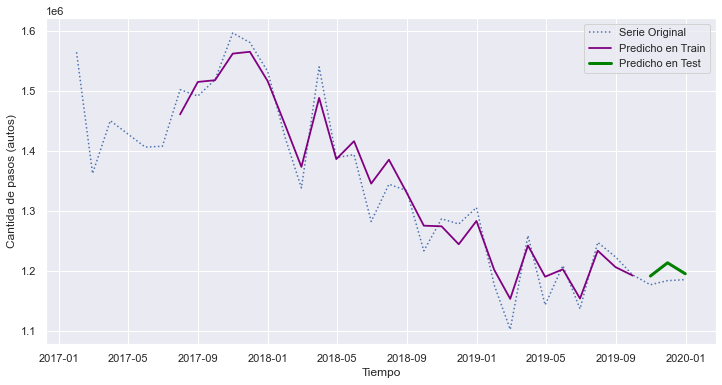

In [70]:
plt.figure(figsize=(12,6))
plt.plot(mensual_pred.index[:length_total2], mensual_pred[:length_total2],':', lw = 1.5, label = 'Serie Original')
plt.plot(mensual_pred.index[look_back2: look_back2 + N_train2], y_train_pred2,'-',lw = 1.8, label = 'Predicho en Train', color='purple')
plt.plot(mensual_pred.index[N_train2 +look_back2: length_total2], y_test_pred2,'-', lw = 3, label = 'Predicho en Test', color = 'green')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantida de pasos (autos)')
plt.show()

Analizamos las variables que el modelo está considerando como importantes para la predicción:

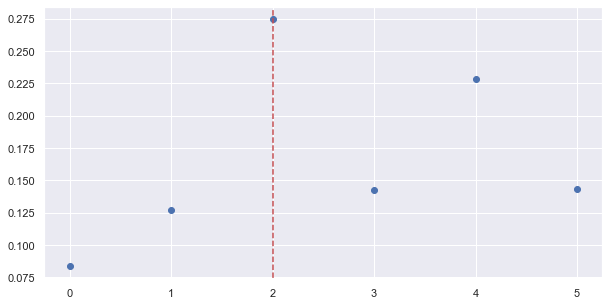

In [71]:
plt.figure(figsize = (10,5))
plt.scatter(np.arange(random_forest_mensual.feature_importances_.size),random_forest_mensual.feature_importances_)
plt.axvline(look_back2 - 4, linestyle ='--', color= 'r')
plt.show()

Tal cual se observa en los gráficos anteriores, el modelo estaría realizando una predicción más elevada a los valores originales, y considera como atributo más importante a la hora de realizar la predicción al cuarto mes inmediato anterior.

A continuación realizaremos también una optimización de la ventana de tiempo utilizada:

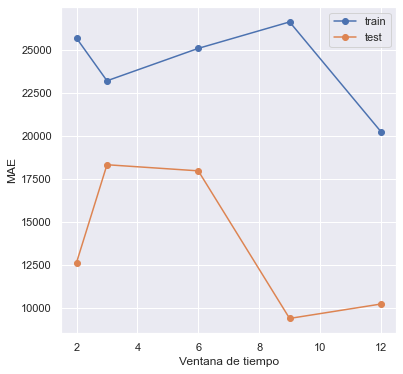

In [72]:
#Optimización manual de la ventana de tiempo o look_back:

# Definimos las listas vacias para los valores de MSE deseados:
lista_MAE_train_mensual = []
lista_MAE_test_mensual = []

# Definimos la lista de valores de 'look_back' que vamos a explorar:
look_backs_mensuales = [2,3,6,9,12]

# Generamos un loop sobre los distintos valores de 'look_back':
for look_back_mensual in look_backs_mensuales:
    
    look_back_mensual = look_back_mensual 

    #Creamos las variables X e y, para rellenar luego con los valores correspondientes:
    N_mensual = mensual_pred.shape[0]
    X_mensual = np.zeros((N_mensual - look_back_mensual,look_back_mensual))
    y_mensual = np.zeros(N_mensual - look_back_mensual)

    #Rellenamos los valores de X e y:
    for i in range(X_mensual.shape[0]):
        X_mensual[i,:] = mensual_pred.iloc[i:i+look_back_mensual]
        y_mensual[i] = mensual_pred.iloc[i+look_back_mensual]

    #Dividimos en grupos de entrenamiento y prueba:
    N_test_mensual =  3 #correspondiente a los 3 últimos meses de 2019:
    N_train_mensual = N_mensual - N_test_mensual - look_back_mensual # cantidad de instancias que vamos a usar para entrenar. 
    N_total_mensual = N_train_mensual + N_test_mensual

    length_total_mensual = N_train_mensual + N_test_mensual + look_back_mensual

    #Definimos el grupo de entrenamiento
    X_train_mensual = X_mensual[:N_train_mensual,:]
    y_train_mensual = y_mensual[:N_train_mensual]

    #Definimos el grupo de prueba
    X_test_mensual = X_mensual[N_train_mensual:N_train_mensual+N_test_mensual,:]
    y_test_mensual = y_mensual[N_train_mensual:N_train_mensual+N_test_mensual]
            
    # Definir el modelo con el valor de profundidad
    rf_mensual = RandomForestRegressor(n_estimators=100, criterion = 'mae', random_state=42)
    
    # Entrenar el modelo
    rf_mensual.fit(X_train_mensual,y_train_mensual)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred_mensual = rf_mensual.predict(X_train_mensual)
    train_MAE_mensual = mean_absolute_error(y_train_mensual, y_train_pred_mensual)
   
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_mensual = rf_mensual.predict(X_test_mensual)
    test_MAE_mensual = mean_absolute_error(y_test_mensual, y_test_pred_mensual)
    
    # Agregar la información a las listas
    lista_MAE_train_mensual.append(train_MAE_mensual)
    lista_MAE_test_mensual.append(test_MAE_mensual)
    
#Luego analizamos el desempeño del modelo para los distintos valores de look_back gráficamente:
matplotlib.rcParams['figure.figsize'] = [6,6]
plt.plot(look_backs_mensuales,lista_MAE_train_mensual,'o-',label='train')
plt.plot(look_backs_mensuales,lista_MAE_test_mensual,'o-',label='test')
plt.legend()
plt.xlabel('Ventana de tiempo');
plt.ylabel('MAE');

El gráfico anterior nos demuestra una situación bastante particular: en **todas** las distintas **ventanas temporales**, el modelo tiene un **mejor desempeño sobre los datos de prueba que sobre los de entrenamiento**, siendo la ventana con **menor MAE para ambos grupos** la anual (**12 meses**).

Por tal motivo, a continuación se fijará dicho valor de look_back para volver a entrenar y evaluar el modelo, y analizar los resultados:

In [73]:
#Definimos una ventana de un año:
look_back2 = 12 

#Creamos las variables X e y, para rellenar luego con los valores correspondientes:
N2 = mensual_pred.shape[0]
X2 = np.zeros((N2 - look_back2,look_back2))
y2 = np.zeros(N2 - look_back2)

#Rellenamos los valores de X e y:
for i in range(X2.shape[0]):
    X2[i,:] = mensual_pred.iloc[i:i+look_back2]
    y2[i] = mensual_pred.iloc[i+look_back2]
    
#Dividimos en grupos de entrenamiento y prueba:
N_test2 = 3 #correspondiente al último trimestre del 2019
N_train2 = N2 - N_test2 - look_back2 # cantidad de instancias que vamos a usar para entrenar. 
N_total2 = N_train2 + N_test2

length_total2 = N_train2 + N_test2 + look_back2

#Definimos el grupo de entrenamiento
X_train2 = X2[:N_train2,:]
y_train2 = y2[:N_train2]

#Definimos el grupo de prueba
X_test2 = X2[N_train2:N_train2+N_test2,:]
y_test2 = y2[N_train2:N_train2+N_test2]

#Entrenamos el modelo con los datos de entrenamiento de nuestra serie mensual:
random_forest_mensual.fit(X_train2,y_train2)

#Predecimos sobre los grupos de entrenamiento y prueba:
y_train_pred2 = random_forest_mensual.predict(X_train2)
y_test_pred2 = random_forest_mensual.predict(X_test2)

#Evaluamos el desempeño del modelo en ambos grupos:
evaluar_modelo(y_train2, y_train_pred2, X_train2, 'Train')
evaluar_modelo(y_test2, y_test_pred2, X_test2, 'Test')

Error en Train: 20257.222142857143 - Porcentual(%): 1.4743569223815902
Error en Test: 10238.295000000004 - Porcentual(%): 0.8493397057861544


Al cambiar el tamaño de la ventana temporal **se redujo el MAE** sobre ambos grupos, alcanzando un valor de **10.200 sobre el grupo de prueba**, que representan apenas un **0.85% de la cantidad promedio de autos** que pasan por la estación de peaje al mes.

A continuación observamos los valores obtenidos por esta última predicción gráficamente:

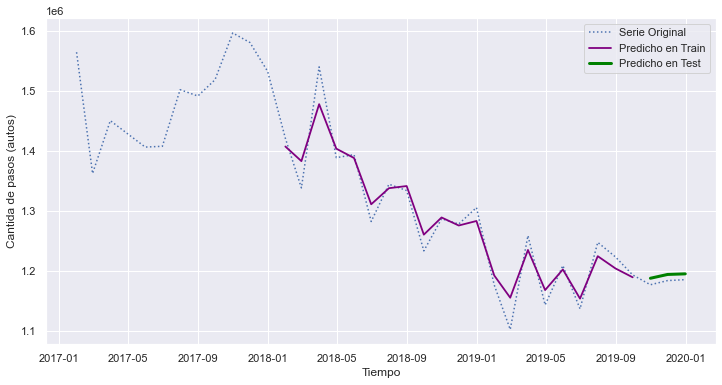

In [74]:
plt.figure(figsize=(12,6))
plt.plot(mensual_pred.index[:length_total2], mensual_pred[:length_total2],':', lw = 1.5, label = 'Serie Original')
plt.plot(mensual_pred.index[look_back2: look_back2 + N_train2], y_train_pred2,'-',lw = 1.8, label = 'Predicho en Train', color='purple')
plt.plot(mensual_pred.index[N_train2 +look_back2: length_total2], y_test_pred2,'-', lw = 3, label = 'Predicho en Test', color = 'green')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantida de pasos (autos)')
plt.show()

Tal cual se puede observar en la figura anterior, al incrementar la ventana temporal o look back la predicción es mucho más acertada.

## C. Multi-Step Prediction:

La técnica de predicción Multi-Step consiste en un modelo recursivo en el cual se parte de un predictor a un paso ('One-Step') ya entrenado, al cual se le va agregando a las variables predictoras o atributos, el resultado de esa predicción.

Trabajaremos nuevamente en las tres granularidades temporales de nuestra serie de tiempo: Diaria, Semanal y Mensual.

## Serie Diaria:

Para realizar esta predicción, se toma el mismo modelo Random Forest utilizado en la predicción One-Step, para luego incorporar los valores predichos por el mismo como atributos para predicciones posteriores.

Error en Test: 3695.2343750000005 - Porcentual(%): 9.458028930624316


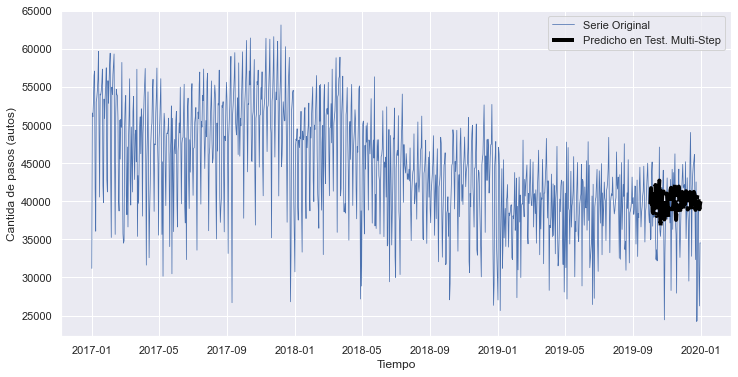

In [75]:
y_ms_test_pred = [] #lista donde se guardarán las predicciones Multi-Step
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test

for i in range(y_test.size):
    y_os_pred = random_forest_diario.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)

y_ms_test_pred = np.array(y_ms_test_pred)

#Evaluamos el desempeño del modelo en ambos grupos:
evaluar_modelo(y_test, y_ms_test_pred, X_test, 'Test')

#Observamos los valores de la predicción gráficamente:
plt.figure(figsize=(12,6))
plt.plot(diario_pred.index[:length_total], diario_pred[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario_pred.index[N_train+look_back: length_total], y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step', color='black')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantida de pasos (autos)')
plt.show()

Tal cual se puede ver en los resultados obtenidos, la **predicción Multi-Step** realizada para el **último trimestre de 2019** (grupo de prueba) arroja un **MAE de 3.695**, que representa un **9,45% de la cantidad promedio de autos diaria**.

Cabe tener en cuenta que como la predicción Multi-Step incluye como variables predictoras a valores predichos por el mismo modelo, el mismo puede acumular errores a medida que nos alejemos de los datos medidos originalmente.

## Serie Semanal:

Error en Test: 27597.674305555545 - Porcentual(%): 10.092547320643366


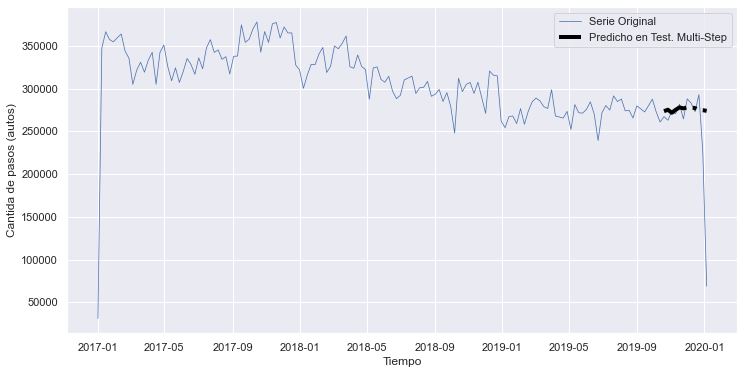

In [76]:
y_ms_test_pred1 = [] #lista donde se guardarán las predicciones Multi-Step
x1 = X_test1[0,:] # arrancamos con la primera instancias del conjunto de test

for i in range(y_test1.size):
    y_os_pred1 = random_forest_semanal.predict(x1.reshape(1,-1))
    y_ms_test_pred1.append(y_os_pred1)
    x1 = np.append(x1[1:], y_os_pred1)

y_ms_test_pred1 = np.array(y_ms_test_pred1)

#Evaluamos el desempeño del modelo en ambos grupos:
evaluar_modelo(y_test1, y_ms_test_pred1, X_test1, 'Test')

#Observamos los valores de la predicción gráficamente:
plt.figure(figsize=(12,6))
plt.plot(semanal_pred.index[:length_total1], semanal_pred[:length_total1],lw = 0.75, label = 'Serie Original')
plt.plot(semanal_pred.index[N_train1+look_back1: length_total1], y_ms_test_pred1,'-.', lw = 4, label = 'Predicho en Test. Multi-Step', color='black')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantida de pasos (autos)')
plt.show()

En este caso, la predicción Multi-Step arroja sorprendentemente un **MAE levemente inferior al obtenido en la predicción One-Step**, con un valor que representa el **10,09% del promedio de autos por semana**.

## Serie Mensual:

Error en Test: 9920.700000000032 - Porcentual(%): 0.8229929318497589


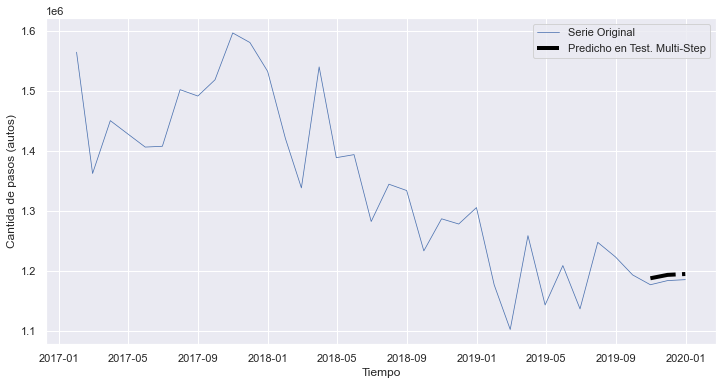

In [77]:
y_ms_test_pred2 = [] #lista donde se guardarán las predicciones Multi-Step
x2 = X_test2[0,:] # arrancamos con la primera instancias del conjunto de test

for i in range(y_test2.size):
    y_os_pred2 = random_forest_mensual.predict(x2.reshape(1,-1))
    y_ms_test_pred2.append(y_os_pred2)
    x2 = np.append(x2[1:], y_os_pred2)

y_ms_test_pred2 = np.array(y_ms_test_pred2)

#Evaluamos el desempeño del modelo en ambos grupos:
evaluar_modelo(y_test2, y_ms_test_pred2, X_test2, 'Test')

#Observamos los valores de la predicción gráficamente:
plt.figure(figsize=(12,6))
plt.plot(mensual_pred.index[:length_total2], mensual_pred[:length_total2],lw = 0.75, label = 'Serie Original')
plt.plot(mensual_pred.index[N_train2+look_back2: length_total2], y_ms_test_pred2,'-.', lw = 4, label = 'Predicho en Test. Multi-Step', color='black')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantida de pasos (autos)')
plt.show()

En el caso de la serie mensual, la predicción Multi-Step obtiene un **MAE levemente inferior al obtenido en la predicción One-Step**, alcanzando un valor de **9.900 (0.82%)**, pero tal cual se mencionó anteriormente, este modelo no es el más confiable debido a que puede arrastrar error de predicciones anteriores.

## D. Predicción para el año 2020

A continuación se realizará una estimación del tráfico para el año 2020 a través de la técnica de **Multi-Step Prediction** para las **series diaria y mensual**. Para llevar esto a cabo, partiremos de los modelos ya entrenados con los datos de 2019, y luego realizaremos predicciones sucesivas para los valores siguientes en ambas series.

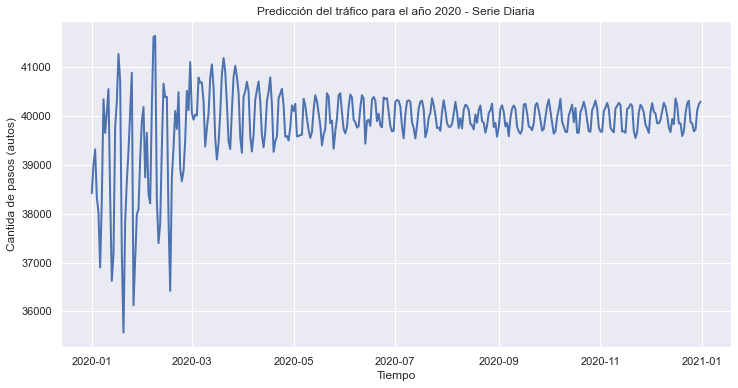

In [78]:
## PREDICCIÓN PARA LA SERIE DIARIA:
y_ms_test_pred_2020 = [] #lista donde se guardarán las predicciones Multi-Step para el 2020
x_2020 = X_test[91,:] # arrancamos con la última instancia del conjunto de test

for i in range(366):
    y_os_pred_diario = random_forest_diario.predict(x_2020.reshape(1,-1)) #tomamos el modelo ya entrenado
    y_ms_test_pred_2020.append(y_os_pred_diario)
    x_2020 = np.append(x_2020[1:], y_os_pred_diario)

y_ms_test_pred_2020 = np.array(y_ms_test_pred_2020)

#Observamos los resultados de la predicción gráficamente:

rango_fechas_diario = pd.date_range(start='01-01-2020', end='31-12-2020', freq = 'd') #establecemos el rango de fechas sobre el que vamos a graficar
plt.figure(figsize=(12,6))
plt.plot(rango_fechas_diario, y_ms_test_pred_2020, lw = 2)
plt.xlabel('Tiempo')
plt.ylabel('Cantida de pasos (autos)')
plt.title('Predicción del tráfico para el año 2020 - Serie Diaria')
plt.show()

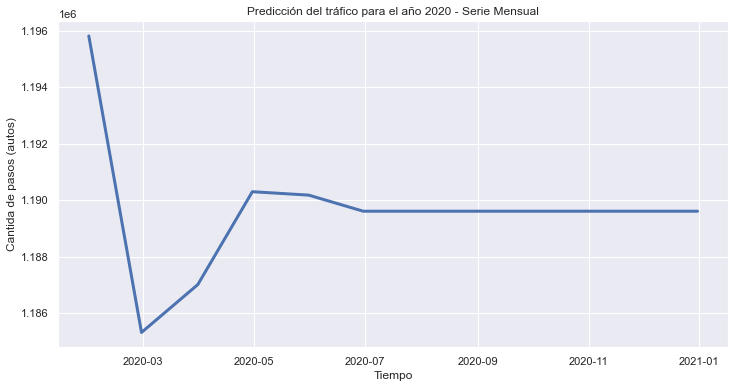

In [79]:
## PREDICCIÓN PARA LA SERIE MENSUAL:
y_ms_test_pred_2020M = [] #lista donde se guardarán las predicciones Multi-Step para el 2020
x_2020M = X_test2[2,:] # arrancamos con la última instancia del conjunto de test

for i in range(12):
    y_os_pred_mensual = random_forest_mensual.predict(x_2020M.reshape(1,-1))
    y_ms_test_pred_2020M.append(y_os_pred_mensual)
    x_2020M = np.append(x_2020M[1:], y_os_pred_mensual)

y_ms_test_pred_2020M = np.array(y_ms_test_pred_2020M)

#Observamos los resultados de la predicción gráficamente:

rango_fechas_mensual = pd.date_range(start='01-01-2020', end='31-12-2020', freq = 'M') #establecemos el rango de fechas sobre el que vamos a graficar
plt.figure(figsize=(12,6))
plt.plot(rango_fechas_mensual, y_ms_test_pred_2020M, lw = 3)
plt.xlabel('Tiempo')
plt.ylabel('Cantida de pasos (autos)')
plt.title('Predicción del tráfico para el año 2020 - Serie Mensual')
plt.show()

Tal cual se puede ver en los gráficos anteriores, a medida que nos alejamos de las mediciones de 2019, los valores de las predicciones tienden a estabilizarse en un valor determinado de la serie, cercano al valor de la media para la serie de tiempo. Cabe recordar que esto se da porque a medida que nos alejamos de las mediciones del 2019, el modelo empieza a acumular el error de las predicciones anteriores. 

# 4. NUEVOS MODELOS:

El objetivo de este proyecto es predecir el tráfico de la autopista Illia para el último trimestre de 2019, para lo cual se trabajó en diferentes granularidades temporales (diaria, semanal y mensual) con objeto de encontrar aquella que nos diera como resultado el menor error posible en la predicción. De acuerdo a lo expuesto hasta el momento, esto fue logrado por el modelo de **One-Step Prediction para la serie Mensual**, que obtuvo un **error absoluto medio (MAE) de 10.200 sobre el grupo de prueba**, mientras que el **error porcentual absoluto medio (MAPE)** fue de tan sólo **0.85**, lo que que representa apenas un **0.85% de la cantidad promedio de autos** que pasan por la estación de peaje al mes.

De todos modos, resulta importante mencionar que la **elección de la granularidad temporal o frecuencia de muestro** con la cual debemos trabajar en nuestras predicciones va a **depender** en realidad de la **naturaleza del problema**: por ejemplo si necesitamos realizar una predicción de futuros embotellamientos en la autopista, seguramente necesitemos trabajar con la serie diaria (u horaria incluso), pero si por otro lado sólo necesitamos el número de autos que van a pasar por la estación para hacer un estimado de recaudación de la misma, tal vez trabajar con la serie mensual sea suficiente.

A continuación se incorporarán los modelos mencionados al inicio del presente trabajo, con el objetivo de encontrar aquel que presente un mejor desempeño en las predicciones, esto es, un menor nivel de error. El análisis se realizará unicamente sobre la **serie Diaria**, ya que considero es la que contiene la información mas detallada acerca del tráfico de la estación de peaje.

## A. Modelo ARIMA:

El **modelo autorregresivo integrado de media móvil (ARIMA)** es uno de los más utilizados en la estadística clásica, y consiste en una **combinación** de: 

 - **Procesos Autorregresivos - AR(p):** aquellos en los que el valor de Y observado en el tiempo **t** depende de sus **p** valores anteriores (t-1, t-2, …, t-p).
 - **Procesos de Media Móvil - MA(q):** buscan incluir en nuestro valor en el momento **t** los distintos valores de ruido blanco que existieron a lo largo del tiempo.

Adicionalmente, el modelo ARIMA trabaja mejor con procesos estacionarios (es decir, con tendencia nula), y como nuestra serie posee una leve tendencia negativa puede que diferenciar a la misma, esto es, crear una nueva variable **Zt** que consiste en la diferencia entre los valores de la serie con sus valores previos. Este proceso se conoce como **integración** (la **I** en el nombre ARIMA).

Los principales **hiperparámetros** de este modelo son:
 - **p:** el número de "lags" temporales (hacia atrás) que el modelo utilizará en la predicción.
 - **d:** el número de orden de las diferenciaciones necesarias para convertir a la serie en estacionaria.
 - **q:** el tamaño de la ventana temporal para el cálculo de la media móvil y los procesos de ruido blanco.

Este modelo se encuentra incluido dentro de la librería **statsmodels**, por lo que el primer paso es importar el modelo:

In [80]:
#Importamos el modelo:
from statsmodels.tsa.arima.model import ARIMA

Para poder aplicar el modelo ARIMA necesitamos determinar los valores de los hiperparámetros ***p, d*** y ***q*** mencionados anteriormente. En primer lugar vamos a determinar el número de orden de diferenciaciones necesarias para convertir en nuestra serie en estacionaria (***d***) a través del método ***ndiffs*** incluido en la librería **pmdarima**, otro paquete utilizado en la aplicación de este tipo de modelos. Este método utliza internamente a la **prueba de Dickey Fuller aumentada (ADF)**, que es una prueba estadística que determina si la serie es estacionaria o no, y en base a ello, determina el numero de diferenciaciones necesarias para convertirla:

In [81]:
# #En primer lugar, instalamos la libreria:
# !pip install pmdarima --user 

# #Cabe aclarar que para esta librería funcione, hay que tener instalada la ultima version de Numpy:
# !pip install numpy --upgrade

In [82]:
#Importamos la herramienta 'ndiffs' que nos permitirá obtener el valor de d:
import pmdarima
from pmdarima.arima.utils import ndiffs

#Obtenemos el orden de diferenciación necesario para convertir nuestra serie en estacionaria:
ndiffs(diario_depurado.cantidad_pasos, test="adf")

0

De acuerdo a lo obtenido por la herramienta utilizada anteriormente, no sería necesario realizar ninguna diferenciación en nuestra serie para convertirla en estacionaria (por lo tanto **nuestra serie sería estacionaria**), por lo que el valor del parámetro ***d*** es cero.

Por otro lado, el hiperparámetro ***p*** se relaciona con la parte Autoregresiva del modelo (AR), y se refiere al número de lagas temporales que se utilizarán como predictores. Este valor **se puede obtener** a través del análisis de la **Autocorrelación Parcial (PACF)** de nuestra serie de tiempo, esto es, la relación entre las observaciones de series de tiempo después de eliminar la influencia de cualquier correlación debido a la condición de retraso más corto. Dicho de otra manera, representa la correlación directa entre la serie con sus diferentes lags temporales, sin tener en cuenta la influencia ejercida en los lags intermedios.

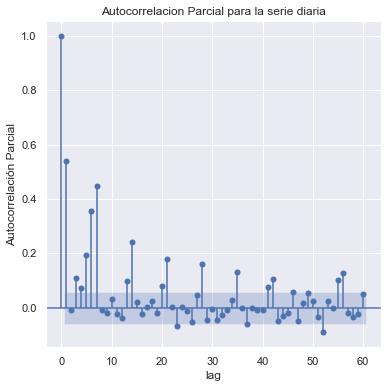

In [83]:
#Importamos el gráfico:
from statsmodels.graphics.tsaplots import plot_pacf

#Graficamos la autocorrelación para la serie diaria:
matplotlib.rcParams['figure.figsize'] = [6,6]
plot_pacf(diario_depurado.cantidad_pasos, lags = 60)
plt.xlabel('lag')
plt.ylabel('Autocorrelación Parcial')
plt.title('Autocorrelacion Parcial para la serie diaria')
plt.show()

De acuerdo a lo observado en el gráfico anterior, la serie presenta una mayor correlación directa con el día inmediato anterior, y con el mismo día de la semana anterior, es decir, 7 días para atrás, por tal motivo asignaremos al parámetro ***p*** este valor. Recordando la parte exploratoria de este informe, se observaba también una mayor autocorrelación total (ACF) cada 7 días, lo que reafirma la elección de este valor.

Por último, antes mencionamos que el parámetro ***q*** está relacionado al tamaño de la ventana temporal para el cálculo de la media móvil y los procesos de ruido blanco que existieron a lo largo del tiempo, por lo que vamos a definirlo en 7 días también.

Con los parámetros ya definidos, ya estamos en condiciones de entrenar el modelo y evaluar sus resultados:

Error en Test: 3892.9474679449418 - Porcentual(%): 10.093475083540662


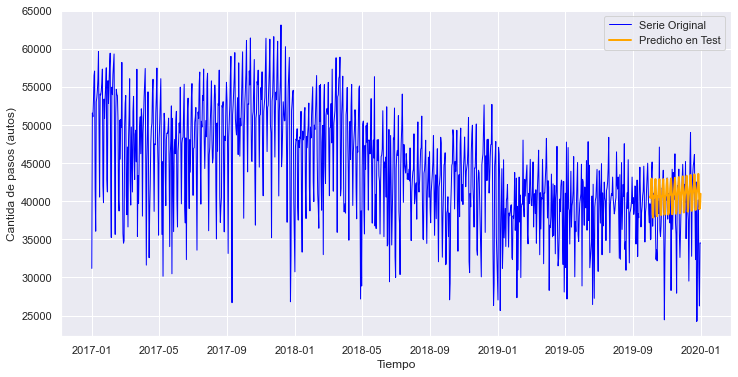

In [84]:
#En primer lugar, separamos nuestros datos en los grupos de entrenamiento y prueba:
diario_prediccion = diario_depurado.cantidad_pasos
N = diario_prediccion.shape[0]
N_test = 92 #correspondiente a los días del último trimestre del 2019
N_train = N - N_test # cantidad de instancias que vamos a usar para entrenar. 

Train_diario = diario_prediccion[:N_train]
Test_diario = diario_prediccion[N_train:N]

#Instanciamos el modelo:
modelo_ARIMA = ARIMA(Train_diario, order = (7, 0, 7))

#Entrenamos el modelo:
result_ARIMA = modelo_ARIMA.fit()

#Realizamos la predicción para la cantidad de días del grupo de prueba:
y_test_pred_diario_ARIMA = result_ARIMA.forecast(N_test)

#Evaluamos el modelo:
evaluar_modelo(Test_diario, y_test_pred_diario_ARIMA, Test_diario, 'Test')

#Observamos el desempeño del modelo gráficamente:
plt.figure(figsize=(12,6))
plt.plot(diario_prediccion.index[:N], diario_prediccion[:N],'-', lw = 1, label = 'Serie Original', color = 'blue')
plt.plot(diario_prediccion.index[N_train: N], y_test_pred_diario_ARIMA,'-', lw = 2, label = 'Predicho en Test', color = 'orange')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantida de pasos (autos)')
plt.show()

Como podemos ver en los resultados obtenidos, la predicción realizada con el modelo ARIMA nos da como resultado un **MAE aproximado de 3.900**, lo que representa un poco más del **10%** del promedio de autos que pasa por día por la estación.

Este resultado no es mejor al que obteníamos en la predicción One-Step, por lo que a continuación utlizaremos una librería que nos permite encontrar el modelo óptimo para realizar la predicción en nuestra serie de tiempo. 

## B. Auto TS:

La librería **Automatic Time Series (Auto TS)** utiliza técnicas de programación genética para encontrar un modelo de pronóstico de series de tiempo óptimo. La **programación genética** es una metodología basada en los algoritmos evolutivos e inspirada en la evolución biológica para desarrollar automáticamente programas que realicen una tarea definida por el usuario. Esta librería permite entrenar múltiples modelos para realizar las predicciones utilizando sólo una línea de código, y luego selecciona aquel que es óptimo, es decir, aquel que obtiene un menor nivel de error.

En primer lugar, instalamos la librería:

In [85]:
# #Instalamos la librería:
# !pip install autots

Una vez instalada la librería, importamos y entrenamos el modelo, para luego entrenarlo, realizar la predicción y evaluar los resultados. Cabe destacar que al instanciar el modelo, podemos seleccionar el peso de distintas métricas que nos darán el score del modelo óptimo; en nuestro caso seleccionaremos como métrica más importante al MAE o error absoluto medio:

In [92]:
#Importamos el modelo:
from autots import AutoTS

#Instanciamos el modelo:
modelo_AutoTS = AutoTS(forecast_length = N_test, n_jobs = -1, metric_weighting = {'smape_weighting': 2, 'mae_weighting': 10, 'rmse_weighting': 0, 'containment_weighting': 0, 'runtime_weighting': 0, 'spl_weighting': 0, 'contour_weighting': 0})

#Entrenamos el modelo con nuestros datos de entrenamiento:
modelo_AutoTS = modelo_AutoTS.fit(Train_diario)

#Predecimos:
prediccion = modelo_AutoTS.predict()

#Asignamos a una variable los resultados de la prediccion
y_test_pred_diario_AutoTS = prediccion.forecast

#Chequeamos cual fue el mejor modelo encontrado por el algoritmo:
modelo_AutoTS.best_model

Inferred frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 10
Model Number: 9 with model ETS in generation 0 of 10
Model Number: 10 with model GLM in generation 0 of 10
Model Number: 11 with model GLM in generation 0 of 10
Model Number: 12 with model GLS in generation 0 of 10
Model Number: 13 with model GLS in generation 0 of 10
Model Number: 14 with model GluonTS in generation 

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 47 with model FBProphet in generation 0 of 10
Model Number: 48 with model RollingRegression in generation 0 of 10
Model Number: 49 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 49: GluonTS
Model Number: 50 with model UnobservedComponents in generation 0 of 10
Model Number: 51 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 51: VAR
Model Number: 52 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 52: VECM
Model Number: 53 with model WindowRegression in generation 0 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    5.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model Number: 54 with model DatepartRegression in generation 0 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.4s finished


Model Number: 55 with model UnivariateRegression in generation 0 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   52.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished


Model Number: 56 with model RollingRegression in generation 0 of 10
Model Number: 57 with model WindowRegression in generation 0 of 10
Model Number: 58 with model ZeroesNaive in generation 0 of 10
Model Number: 59 with model SeasonalNaive in generation 0 of 10
Model Number: 60 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 60: GluonTS
Model Number: 61 with model ZeroesNaive in generation 0 of 10
Model Number: 62 with model UnobservedComponents in generation 0 of 10
Model Number: 63 with model RollingRegression in generation 0 of 10
Model Number: 64 with model GLM in generation 0 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 64: GLM
Model Number: 65 with model SeasonalNaive in generation 0 of 10
Model Number: 66 with model UnobservedComponents in generation 0 of 10
Model Number: 67 with model Sea

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 80 with model FBProphet in generation 0 of 10
Model Number: 81 with model AverageValueNaive in generation 0 of 10
Model Number: 82 with model UnivariateRegression in generation 0 of 10
Model Number: 83 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 83: VECM
Model Number: 84 with model UnobservedComponents in generation 0 of 10
Model Number: 85 with model SeasonalNaive in generation 0 of 10
Model Number: 86 with model GLS in generation 0 of 10
Model Number: 87 with model UnobservedComponents in generation 0 of 10
Model Number: 88 with model SeasonalNaive in generation 0 of 10
Model Number: 89 with model LastValueNaive in generation 0 of 10
Model Number: 90 with model GLM in generation 0 of 10
Model Number: 91 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 91: VECM
Model Number: 92 with model GluonTS in generation 0 of 10
Template Eval Error: I

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 96 with model FBProphet in generation 0 of 10
Model Number: 97 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 97: GluonTS
Model Number: 98 with model SeasonalNaive in generation 0 of 10
Model Number: 99 with model UnivariateRegression in generation 0 of 10
Model Number: 100 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 100: GluonTS
Model Number: 101 with model UnobservedComponents in generation 0 of 10
Model Number: 102 with model UnivariateRegression in generation 0 of 10
Model Number: 103 with model RollingRegression in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 103: RollingRegression
New Generation: 1 of 10
Model Number: 104 with model WindowRegression in generation 1 of 10
Tem

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 131 with model FBProphet in generation 1 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 132 with model FBProphet in generation 1 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 133 with model FBProphet in generation 1 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 134 with model FBProphet in generation 1 of 10
Model Number: 135 with model ZeroesNaive in generation 1 of 10
Model Number: 136 with model ZeroesNaive in generation 1 of 10
Model Number: 137 with model ZeroesNaive in generation 1 of 10
Model Number: 138 with model GLS in generation 1 of 10
Model Number: 139 with model GLS in generation 1 of 10
Model Number: 140 with model GLS in generation 1 of 10
Template Eval Error: ValueError('zero-size array to reduction operation maximum which has no identity') in model 140: GLS
Model Number: 141 with model RollingRegression in generation 1 of 10
Model Number: 142 with model RollingRegression in generation 1 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 142: RollingRegression
Model Number: 143 with model RollingRegression in generation 1 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 143: RollingRegre

C:\Users\Javi Dichiachio\miniconda3\envs\datascience2\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 147 with model GLM in generation 1 of 10
Model Number: 148 with model GLM in generation 1 of 10
Model Number: 149 with model GluonTS in generation 1 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 149: GluonTS
Model Number: 150 with model GluonTS in generation 1 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 150: GluonTS
Model Number: 151 with model GluonTS in generation 1 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 151: GluonTS
Model Number: 152 with model GluonTS in generation 1 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 152: GluonTS
Model Number: 153 with model VAR in generation 1 of 10
Template Eval Error: ValueError('Only gave 

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 189 with model FBProphet in generation 2 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 190 with model FBProphet in generation 2 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 191 with model FBProphet in generation 2 of 10
Model Number: 192 with model ZeroesNaive in generation 2 of 10
Model Number: 193 with model ZeroesNaive in generation 2 of 10
Model Number: 194 with model ZeroesNaive in generation 2 of 10
Template Eval Error: ValueError('Length mismatch: Expected axis has 912 elements, new values have 1 elements') in model 194: ZeroesNaive
Model Number: 195 with model GLS in generation 2 of 10
Model Number: 196 with model GLS in generation 2 of 10
Model Number: 197 with model GLS in generation 2 of 10
Model Number: 198 with model RollingRegression in generation 2 of 10
Model Number: 199 with model RollingRegression in generation 2 of 10
Model Number: 200 with model RollingRegression in generation 2 of 10
Model Number: 201 with model RollingRegression in generation 2 of 10
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 201: RollingRegression
Model Number: 202 with model GLM in generation 2 of 10
Template Eval E

C:\Users\Javi Dichiachio\miniconda3\envs\datascience2\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 205 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 205: GluonTS
Model Number: 206 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 206: GluonTS
Model Number: 207 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 207: GluonTS
Model Number: 208 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 208: GluonTS
Model Number: 209 with model VAR in generation 2 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 209: VAR
Model Number: 210 with model VAR in generation 2 of 10
Template Eval E

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 245 with model FBProphet in generation 3 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 246 with model FBProphet in generation 3 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 247 with model FBProphet in generation 3 of 10
Model Number: 248 with model ZeroesNaive in generation 3 of 10
Model Number: 249 with model ZeroesNaive in generation 3 of 10
Model Number: 250 with model ZeroesNaive in generation 3 of 10
Model Number: 251 with model GLS in generation 3 of 10
Model Number: 252 with model GLS in generation 3 of 10
Model Number: 253 with model GLM in generation 3 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 253: GLM
Model Number: 254 with model GLM in generation 3 of 10


C:\Users\Javi Dichiachio\miniconda3\envs\datascience2\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 255 with model GLM in generation 3 of 10


C:\Users\Javi Dichiachio\miniconda3\envs\datascience2\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 256 with model GLM in generation 3 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 256: GLM
Model Number: 257 with model RollingRegression in generation 3 of 10
Model Number: 258 with model RollingRegression in generation 3 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model Number: 259 with model RollingRegression in generation 3 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model Number: 260 with model RollingRegression in generation 3 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   50.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model Number: 261 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 261: GluonTS
Model Number: 262 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 262: GluonTS
Model Number: 263 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 263: GluonTS
Model Number: 264 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 264: GluonTS
Model Number: 265 with model VAR in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 265: VAR
Model Number: 266 with model VAR in generation 3 of 10
Template Eval E

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished


Model Number: 285 with model DatepartRegression in generation 4 of 10
Model Number: 286 with model AverageValueNaive in generation 4 of 10
Model Number: 287 with model AverageValueNaive in generation 4 of 10
Model Number: 288 with model AverageValueNaive in generation 4 of 10
Model Number: 289 with model UnobservedComponents in generation 4 of 10
Model Number: 290 with model UnobservedComponents in generation 4 of 10
Model Number: 291 with model UnobservedComponents in generation 4 of 10
Model Number: 292 with model ETS in generation 4 of 10
Model Number: 293 with model ETS in generation 4 of 10
Model Number: 294 with model ETS in generation 4 of 10
Model Number: 295 with model ETS in generation 4 of 10
Model Number: 296 with model LastValueNaive in generation 4 of 10
Model Number: 297 with model LastValueNaive in generation 4 of 10
Model Number: 298 with model LastValueNaive in generation 4 of 10
Model Number: 299 with model RollingRegression in generation 4 of 10
Model Number: 300 wi

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    5.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model Number: 301 with model RollingRegression in generation 4 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model Number: 302 with model RollingRegression in generation 4 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    5.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model Number: 303 with model FBProphet in generation 4 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 304 with model FBProphet in generation 4 of 10
Template Eval Error: AttributeError("'list' object has no attribute 'shape'") in model 304: FBProphet
Model Number: 305 with model FBProphet in generation 4 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 306 with model FBProphet in generation 4 of 10
Model Number: 307 with model ZeroesNaive in generation 4 of 10
Model Number: 308 with model ZeroesNaive in generation 4 of 10
Model Number: 309 with model ZeroesNaive in generation 4 of 10
Model Number: 310 with model GLS in generation 4 of 10
Model Number: 311 with model GLS in generation 4 of 10
Model Number: 312 with model GLS in generation 4 of 10
Model Number: 313 with model GLM in generation 4 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 313: GLM
Model Number: 314 with model GLM in generation 4 of 10
Model Number: 315 with model GLM in generation 4 of 10


C:\Users\Javi Dichiachio\miniconda3\envs\datascience2\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 316 with model GLM in generation 4 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 316: GLM
Model Number: 317 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 317: GluonTS
Model Number: 318 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 318: GluonTS
Model Number: 319 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 319: GluonTS
Model Number: 320 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in mod

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.4s finished


Model Number: 343 with model UnobservedComponents in generation 5 of 10
Model Number: 344 with model UnobservedComponents in generation 5 of 10
Model Number: 345 with model UnobservedComponents in generation 5 of 10
Model Number: 346 with model AverageValueNaive in generation 5 of 10
Model Number: 347 with model AverageValueNaive in generation 5 of 10
Model Number: 348 with model AverageValueNaive in generation 5 of 10
Model Number: 349 with model ETS in generation 5 of 10
Model Number: 350 with model ETS in generation 5 of 10
Model Number: 351 with model ETS in generation 5 of 10
Model Number: 352 with model LastValueNaive in generation 5 of 10
Model Number: 353 with model LastValueNaive in generation 5 of 10
Model Number: 354 with model LastValueNaive in generation 5 of 10
Model Number: 355 with model GLS in generation 5 of 10
Model Number: 356 with model GLS in generation 5 of 10
Model Number: 357 with model GLS in generation 5 of 10
Model Number: 358 with model RollingRegression in

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model Number: 360 with model RollingRegression in generation 5 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 360: RollingRegression
Model Number: 361 with model RollingRegression in generation 5 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 361: RollingRegression
Model Number: 362 with model FBProphet in generation 5 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 363 with model FBProphet in generation 5 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 364 with model FBProphet in generation 5 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 365 with model FBProphet in generation 5 of 10
Model Number: 366 with model ZeroesNaive in generation 5 of 10
Model Number: 367 with model GLM in generation 5 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 367: GLM
Model Number: 368 with model GLM in generation 5 of 10


C:\Users\Javi Dichiachio\miniconda3\envs\datascience2\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 369 with model GLM in generation 5 of 10
Model Number: 370 with model GLM in generation 5 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 370: GLM
Model Number: 371 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 371: GluonTS
Model Number: 372 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 372: GluonTS
Model Number: 373 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 373: GluonTS
Model Number: 374 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    5.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model Number: 407 with model RollingRegression in generation 6 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model Number: 408 with model RollingRegression in generation 6 of 10
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 408: RollingRegression
Model Number: 409 with model RollingRegression in generation 6 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model Number: 410 with model LastValueNaive in generation 6 of 10
Model Number: 411 with model LastValueNaive in generation 6 of 10
Model Number: 412 with model GLS in generation 6 of 10
Model Number: 413 with model GLS in generation 6 of 10
Model Number: 414 with model GLS in generation 6 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 415 with model FBProphet in generation 6 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 416 with model FBProphet in generation 6 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 417 with model FBProphet in generation 6 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 418 with model FBProphet in generation 6 of 10
Model Number: 419 with model ZeroesNaive in generation 6 of 10
Model Number: 420 with model ZeroesNaive in generation 6 of 10
Model Number: 421 with model ZeroesNaive in generation 6 of 10
Model Number: 422 with model GLM in generation 6 of 10


C:\Users\Javi Dichiachio\miniconda3\envs\datascience2\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 423 with model GLM in generation 6 of 10
Model Number: 424 with model GLM in generation 6 of 10
Model Number: 425 with model GLM in generation 6 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 425: GLM
Model Number: 426 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 426: GluonTS
Model Number: 427 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 427: GluonTS
Model Number: 428 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 428: GluonTS
Model Number: 429 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not 

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 471 with model FBProphet in generation 7 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 472 with model FBProphet in generation 7 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 473 with model FBProphet in generation 7 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 474 with model FBProphet in generation 7 of 10
Model Number: 475 with model ZeroesNaive in generation 7 of 10
Model Number: 476 with model ZeroesNaive in generation 7 of 10
Model Number: 477 with model ZeroesNaive in generation 7 of 10
Model Number: 478 with model GLM in generation 7 of 10


C:\Users\Javi Dichiachio\miniconda3\envs\datascience2\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 479 with model GLM in generation 7 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 479: GLM
Model Number: 480 with model GLM in generation 7 of 10


C:\Users\Javi Dichiachio\miniconda3\envs\datascience2\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 481 with model GLM in generation 7 of 10


C:\Users\Javi Dichiachio\miniconda3\envs\datascience2\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 482 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 482: GluonTS
Model Number: 483 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 483: GluonTS
Model Number: 484 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 484: GluonTS
Model Number: 485 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 485: GluonTS
Model Number: 486 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 486: VAR
Model Number: 487 with model VAR in generation 7 of 10
Template Eval E

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model Number: 520 with model RollingRegression in generation 8 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model Number: 521 with model RollingRegression in generation 8 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    5.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model Number: 522 with model RollingRegression in generation 8 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model Number: 523 with model LastValueNaive in generation 8 of 10
Model Number: 524 with model LastValueNaive in generation 8 of 10
Model Number: 525 with model FBProphet in generation 8 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 526 with model FBProphet in generation 8 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 527 with model FBProphet in generation 8 of 10
Model Number: 528 with model ZeroesNaive in generation 8 of 10
Model Number: 529 with model ZeroesNaive in generation 8 of 10
Model Number: 530 with model ZeroesNaive in generation 8 of 10
Model Number: 531 with model GLM in generation 8 of 10


C:\Users\Javi Dichiachio\miniconda3\envs\datascience2\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 532 with model GLM in generation 8 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 532: GLM
Model Number: 533 with model GLM in generation 8 of 10
Model Number: 534 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 534: GluonTS
Model Number: 535 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 535: GluonTS
Model Number: 536 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 536: GluonTS
Model Number: 537 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   11.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished


Model Number: 546 with model WindowRegression in generation 9 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    6.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.2s finished


Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 546: WindowRegression
Model Number: 547 with model WindowRegression in generation 9 of 10
Model Number: 548 with model SeasonalNaive in generation 9 of 10
Model Number: 549 with model SeasonalNaive in generation 9 of 10
Model Number: 550 with model SeasonalNaive in generation 9 of 10
Model Number: 551 with model SeasonalNaive in generation 9 of 10
Model Number: 552 with model DatepartRegression in generation 9 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    5.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished


Model Number: 553 with model DatepartRegression in generation 9 of 10
Model Number: 554 with model DatepartRegression in generation 9 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 554: DatepartRegression
Model Number: 555 with model UnivariateRegression in generation 9 of 10
Model Number: 556 with model UnivariateRegression in generation 9 of 10
Model Number: 557 with model UnivariateRegression in generation 9 of 10
Model Number: 558 with model UnivariateRegression in generation 9 of 10
Model Number: 559 with model AverageValueNaive in generation 9 of 10
Model Number: 560 with model AverageValueNaive in generation 9 of 10
Model Number: 561 with model AverageValueNaive in generation 9 of 10
Model Number: 562 with model UnobservedComponents in generation 9 of 10
Model Number: 563 with model UnobservedComponents in generation 9 of 10
Model Number: 564 with model UnobservedComponents in generation 9 of 10
Model Number: 565 with model RollingRegressio

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 582 with model ZeroesNaive in generation 9 of 10
Model Number: 583 with model ZeroesNaive in generation 9 of 10
Model Number: 584 with model ZeroesNaive in generation 9 of 10
Model Number: 585 with model GLM in generation 9 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 585: GLM
Model Number: 586 with model GLM in generation 9 of 10


C:\Users\Javi Dichiachio\miniconda3\envs\datascience2\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 587 with model GLM in generation 9 of 10


C:\Users\Javi Dichiachio\miniconda3\envs\datascience2\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 588 with model GLM in generation 9 of 10
Model Number: 589 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 589: GluonTS
Model Number: 590 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 590: GluonTS
Model Number: 591 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 591: GluonTS
Model Number: 592 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 592: GluonTS
Model Number: 593 with model VAR in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 593: VAR
Model Number: 5

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    5.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished


Model Number: 610 with model UnivariateRegression in generation 10 of 10
Model Number: 611 with model UnivariateRegression in generation 10 of 10
Model Number: 612 with model UnivariateRegression in generation 10 of 10
Model Number: 613 with model UnivariateRegression in generation 10 of 10
Model Number: 614 with model AverageValueNaive in generation 10 of 10
Model Number: 615 with model AverageValueNaive in generation 10 of 10
Model Number: 616 with model UnobservedComponents in generation 10 of 10
Model Number: 617 with model UnobservedComponents in generation 10 of 10
Model Number: 618 with model UnobservedComponents in generation 10 of 10
Model Number: 619 with model RollingRegression in generation 10 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model Number: 620 with model RollingRegression in generation 10 of 10
Model Number: 621 with model RollingRegression in generation 10 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    5.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model Number: 622 with model RollingRegression in generation 10 of 10
Model Number: 623 with model GLS in generation 10 of 10
Model Number: 624 with model GLS in generation 10 of 10
Model Number: 625 with model GLS in generation 10 of 10
Model Number: 626 with model ETS in generation 10 of 10
Model Number: 627 with model ETS in generation 10 of 10
Model Number: 628 with model LastValueNaive in generation 10 of 10
Model Number: 629 with model LastValueNaive in generation 10 of 10
Model Number: 630 with model FBProphet in generation 10 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 631 with model FBProphet in generation 10 of 10
Model Number: 632 with model Ensemble in generation 0 of 0


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.4s finished


Model Number: 633 with model Ensemble in generation 0 of 0


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.5s finished


Model Number: 634 with model Ensemble in generation 0 of 0


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished


Model Number: 635 with model Ensemble in generation 0 of 0


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished


Model Number: 636 with model Ensemble in generation 0 of 0
Validation Round: 1
Model Number: 1 of 95 with model Ensemble for Validation 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished


Model 1 of model Ensemble with avg smape 14.44: 
Model Number: 2 of 95 with model Ensemble for Validation 1
Model 2 of model Ensemble with avg smape 12.11: 
Model Number: 3 of 95 with model Ensemble for Validation 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.4s finished


Model 3 of model Ensemble with avg smape 14.48: 
Model Number: 4 of 95 with model Ensemble for Validation 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished


Model 4 of model Ensemble with avg smape 14.41: 
Model Number: 5 of 95 with model Ensemble for Validation 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished


Model 5 of model Ensemble with avg smape 14.51: 
Model Number: 6 of 95 with model WindowRegression for Validation 1
Model 6 of model WindowRegression with avg smape 14.34: 
Model Number: 7 of 95 with model SeasonalNaive for Validation 1
Model 7 of model SeasonalNaive with avg smape 15.79: 
Model Number: 8 of 95 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.5s finished


Model 8 of model DatepartRegression with avg smape 13.57: 
Model Number: 9 of 95 with model SeasonalNaive for Validation 1
Model 9 of model SeasonalNaive with avg smape 16.93: 
Model Number: 10 of 95 with model SeasonalNaive for Validation 1
Model 10 of model SeasonalNaive with avg smape 16.94: 
Model Number: 11 of 95 with model SeasonalNaive for Validation 1
Model 11 of model SeasonalNaive with avg smape 16.94: 
Model Number: 12 of 95 with model SeasonalNaive for Validation 1
Model 12 of model SeasonalNaive with avg smape 16.93: 
Model Number: 13 of 95 with model SeasonalNaive for Validation 1
Model 13 of model SeasonalNaive with avg smape 16.93: 
Model Number: 14 of 95 with model UnivariateRegression for Validation 1
Model 14 of model UnivariateRegression with avg smape 12.63: 
Model Number: 15 of 95 with model UnivariateRegression for Validation 1
Model 15 of model UnivariateRegression with avg smape 15.02: 
Model Number: 16 of 95 with model SeasonalNaive for Validation 1
Model 16 o

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model 31 of model RollingRegression with avg smape 10.68: 
Model Number: 32 of 95 with model UnobservedComponents for Validation 1
Model 32 of model UnobservedComponents with avg smape 11.18: 
Model Number: 33 of 95 with model DatepartRegression for Validation 1
Model 33 of model DatepartRegression with avg smape 13.59: 
Model Number: 34 of 95 with model DatepartRegression for Validation 1
Model 34 of model DatepartRegression with avg smape 13.81: 
Model Number: 35 of 95 with model RollingRegression for Validation 1
Model 35 of model RollingRegression with avg smape 13.19: 
Model Number: 36 of 95 with model AverageValueNaive for Validation 1
Model 36 of model AverageValueNaive with avg smape 10.49: 
Model Number: 37 of 95 with model AverageValueNaive for Validation 1
Model 37 of model AverageValueNaive with avg smape 10.49: 
Model Number: 38 of 95 with model DatepartRegression for Validation 1
Model 38 of model DatepartRegression with avg smape 11.69: 
Model Number: 39 of 95 with model

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model 47 of model RollingRegression with avg smape 15.1: 
Model Number: 48 of 95 with model RollingRegression for Validation 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model 48 of model RollingRegression with avg smape 16.33: 
Model Number: 49 of 95 with model AverageValueNaive for Validation 1
Model 49 of model AverageValueNaive with avg smape 11.09: 
Model Number: 50 of 95 with model ETS for Validation 1
Model 50 of model ETS with avg smape 11.55: 
Model Number: 51 of 95 with model ETS for Validation 1
Model 51 of model ETS with avg smape 11.55: 
Model Number: 52 of 95 with model ETS for Validation 1
Model 52 of model ETS with avg smape 11.55: 
Model Number: 53 of 95 with model ETS for Validation 1
Model 53 of model ETS with avg smape 11.55: 
Model Number: 54 of 95 with model ETS for Validation 1
Model 54 of model ETS with avg smape 11.56: 
Model Number: 55 of 95 with model ETS for Validation 1
Model 55 of model ETS with avg smape 11.56: 
Model Number: 56 of 95 with model ETS for Validation 1
Model 56 of model ETS with avg smape 11.56: 
Model Number: 57 of 95 with model AverageValueNaive for Validation 1
Model 57 of model AverageValueNaive with avg

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model 58 of model RollingRegression with avg smape 13.26: 
Model Number: 59 of 95 with model LastValueNaive for Validation 1
Model 59 of model LastValueNaive with avg smape 14.62: 
Model Number: 60 of 95 with model LastValueNaive for Validation 1
Model 60 of model LastValueNaive with avg smape 14.62: 
Model Number: 61 of 95 with model LastValueNaive for Validation 1
Model 61 of model LastValueNaive with avg smape 14.62: 
Model Number: 62 of 95 with model LastValueNaive for Validation 1
Model 62 of model LastValueNaive with avg smape 14.62: 
Model Number: 63 of 95 with model LastValueNaive for Validation 1
Model 63 of model LastValueNaive with avg smape 14.62: 
Model Number: 64 of 95 with model GLS for Validation 1
Model 64 of model GLS with avg smape 11.09: 
Model Number: 65 of 95 with model RollingRegression for Validation 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model 65 of model RollingRegression with avg smape 12.4: 
Model Number: 66 of 95 with model LastValueNaive for Validation 1


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 66 of model LastValueNaive with avg smape 17.54: 
Model Number: 67 of 95 with model FBProphet for Validation 1


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 67 of model FBProphet with avg smape 14.2: 
Model Number: 68 of 95 with model FBProphet for Validation 1


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 68 of model FBProphet with avg smape 13.01: 
Model Number: 69 of 95 with model FBProphet for Validation 1


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 69 of model FBProphet with avg smape 14.8: 
Model Number: 70 of 95 with model FBProphet for Validation 1


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 70 of model FBProphet with avg smape 14.8: 
Model Number: 71 of 95 with model FBProphet for Validation 1


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 71 of model FBProphet with avg smape 14.35: 
Model Number: 72 of 95 with model FBProphet for Validation 1
Model 72 of model FBProphet with avg smape 14.35: 
Model Number: 73 of 95 with model WindowRegression for Validation 1
Model 73 of model WindowRegression with avg smape 13.92: 
Model Number: 74 of 95 with model LastValueNaive for Validation 1
Model 74 of model LastValueNaive with avg smape 14.1: 
Model Number: 75 of 95 with model WindowRegression for Validation 1
Model 75 of model WindowRegression with avg smape 12.03: 
Model Number: 76 of 95 with model GLS for Validation 1
Model 76 of model GLS with avg smape 14.47: 
Model Number: 77 of 95 with model GLS for Validation 1
Model 77 of model GLS with avg smape 14.47: 
Model Number: 78 of 95 with model WindowRegression for Validation 1
Model 78 of model WindowRegression with avg smape 10.63: 
Model Number: 79 of 95 with model ZeroesNaive for Validation 1
Model 79 of model ZeroesNaive with avg smape 13.47: 
Model Number: 80 of 95

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 88 of model GLS with avg smape 10.73: 
Model Number: 89 of 95 with model FBProphet for Validation 1
Model 89 of model FBProphet with avg smape 14.27: 
Model Number: 90 of 95 with model GLM for Validation 1


C:\Users\Javi Dichiachio\miniconda3\envs\datascience2\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model 90 of model GLM with avg smape 16.58: 
Model Number: 91 of 95 with model GLM for Validation 1


C:\Users\Javi Dichiachio\miniconda3\envs\datascience2\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model 91 of model GLM with avg smape 16.65: 
Model Number: 92 of 95 with model GLM for Validation 1


C:\Users\Javi Dichiachio\miniconda3\envs\datascience2\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model 92 of model GLM with avg smape 16.7: 
Model Number: 93 of 95 with model GLM for Validation 1


C:\Users\Javi Dichiachio\miniconda3\envs\datascience2\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model 93 of model GLM with avg smape 16.81: 
Model Number: 94 of 95 with model GLM for Validation 1


C:\Users\Javi Dichiachio\miniconda3\envs\datascience2\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model 94 of model GLM with avg smape 31.33: 
Model Number: 95 of 95 with model GLM for Validation 1
Model 95 of model GLM with avg smape 18.67: 
Validation Round: 2
Model Number: 1 of 95 with model Ensemble for Validation 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.5s finished


Model 1 of model Ensemble with avg smape 14.53: 
Model Number: 2 of 95 with model Ensemble for Validation 2
Model 2 of model Ensemble with avg smape 20.36: 
Model Number: 3 of 95 with model Ensemble for Validation 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.5s finished


Model 3 of model Ensemble with avg smape 15.16: 
Model Number: 4 of 95 with model Ensemble for Validation 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.4s finished


Model 4 of model Ensemble with avg smape 15.17: 
Model Number: 5 of 95 with model Ensemble for Validation 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.5s finished


Model 5 of model Ensemble with avg smape 15.25: 
Model Number: 6 of 95 with model WindowRegression for Validation 2
Model 6 of model WindowRegression with avg smape 13.98: 
Model Number: 7 of 95 with model SeasonalNaive for Validation 2
Model 7 of model SeasonalNaive with avg smape 19.68: 
Model Number: 8 of 95 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.5s finished


Model 8 of model DatepartRegression with avg smape 12.88: 
Model Number: 9 of 95 with model SeasonalNaive for Validation 2
Model 9 of model SeasonalNaive with avg smape 19.73: 
Model Number: 10 of 95 with model SeasonalNaive for Validation 2
Model 10 of model SeasonalNaive with avg smape 19.75: 
Model Number: 11 of 95 with model SeasonalNaive for Validation 2
Model 11 of model SeasonalNaive with avg smape 19.75: 
Model Number: 12 of 95 with model SeasonalNaive for Validation 2
Model 12 of model SeasonalNaive with avg smape 19.73: 
Model Number: 13 of 95 with model SeasonalNaive for Validation 2
Model 13 of model SeasonalNaive with avg smape 19.73: 
Model Number: 14 of 95 with model UnivariateRegression for Validation 2
Model 14 of model UnivariateRegression with avg smape 11.33: 
Model Number: 15 of 95 with model UnivariateRegression for Validation 2
Model 15 of model UnivariateRegression with avg smape 15.51: 
Model Number: 16 of 95 with model SeasonalNaive for Validation 2
Model 16 o

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model 31 of model RollingRegression with avg smape 12.14: 
Model Number: 32 of 95 with model UnobservedComponents for Validation 2
Model 32 of model UnobservedComponents with avg smape 13.1: 
Model Number: 33 of 95 with model DatepartRegression for Validation 2
Model 33 of model DatepartRegression with avg smape 15.68: 
Model Number: 34 of 95 with model DatepartRegression for Validation 2
Model 34 of model DatepartRegression with avg smape 14.2: 
Model Number: 35 of 95 with model RollingRegression for Validation 2
Model 35 of model RollingRegression with avg smape 17.08: 
Model Number: 36 of 95 with model AverageValueNaive for Validation 2
Model 36 of model AverageValueNaive with avg smape 9.97: 
Model Number: 37 of 95 with model AverageValueNaive for Validation 2
Model 37 of model AverageValueNaive with avg smape 9.98: 
Model Number: 38 of 95 with model DatepartRegression for Validation 2
Model 38 of model DatepartRegression with avg smape 12.89: 
Model Number: 39 of 95 with model Dat

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model 47 of model RollingRegression with avg smape 10.11: 
Model Number: 48 of 95 with model RollingRegression for Validation 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model 48 of model RollingRegression with avg smape 23.46: 
Model Number: 49 of 95 with model AverageValueNaive for Validation 2
Model 49 of model AverageValueNaive with avg smape 12.84: 
Model Number: 50 of 95 with model ETS for Validation 2
Model 50 of model ETS with avg smape 14.09: 
Model Number: 51 of 95 with model ETS for Validation 2
Model 51 of model ETS with avg smape 14.09: 
Model Number: 52 of 95 with model ETS for Validation 2
Model 52 of model ETS with avg smape 14.09: 
Model Number: 53 of 95 with model ETS for Validation 2
Model 53 of model ETS with avg smape 14.09: 
Model Number: 54 of 95 with model ETS for Validation 2
Model 54 of model ETS with avg smape 14.09: 
Model Number: 55 of 95 with model ETS for Validation 2
Model 55 of model ETS with avg smape 14.09: 
Model Number: 56 of 95 with model ETS for Validation 2
Model 56 of model ETS with avg smape 14.09: 
Model Number: 57 of 95 with model AverageValueNaive for Validation 2
Model 57 of model AverageValueNaive with avg

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model 58 of model RollingRegression with avg smape 12.12: 
Model Number: 59 of 95 with model LastValueNaive for Validation 2
Model 59 of model LastValueNaive with avg smape 17.16: 
Model Number: 60 of 95 with model LastValueNaive for Validation 2
Model 60 of model LastValueNaive with avg smape 17.16: 
Model Number: 61 of 95 with model LastValueNaive for Validation 2
Model 61 of model LastValueNaive with avg smape 17.16: 
Model Number: 62 of 95 with model LastValueNaive for Validation 2
Model 62 of model LastValueNaive with avg smape 17.16: 
Model Number: 63 of 95 with model LastValueNaive for Validation 2
Model 63 of model LastValueNaive with avg smape 17.16: 
Model Number: 64 of 95 with model GLS for Validation 2
Model 64 of model GLS with avg smape 12.25: 
Model Number: 65 of 95 with model RollingRegression for Validation 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Model 65 of model RollingRegression with avg smape 11.08: 
Model Number: 66 of 95 with model LastValueNaive for Validation 2
Model 66 of model LastValueNaive with avg smape 10.99: 
Model Number: 67 of 95 with model FBProphet for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 67 of model FBProphet with avg smape 9.63: 
Model Number: 68 of 95 with model FBProphet for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 68 of model FBProphet with avg smape 9.64: 
Model Number: 69 of 95 with model FBProphet for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 69 of model FBProphet with avg smape 9.46: 
Model Number: 70 of 95 with model FBProphet for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 70 of model FBProphet with avg smape 9.46: 
Model Number: 71 of 95 with model FBProphet for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 71 of model FBProphet with avg smape 9.77: 
Model Number: 72 of 95 with model FBProphet for Validation 2
Model 72 of model FBProphet with avg smape 9.77: 
Model Number: 73 of 95 with model WindowRegression for Validation 2
Model 73 of model WindowRegression with avg smape 12.18: 
Model Number: 74 of 95 with model LastValueNaive for Validation 2
Model 74 of model LastValueNaive with avg smape 15.56: 
Model Number: 75 of 95 with model WindowRegression for Validation 2
Model 75 of model WindowRegression with avg smape 23.45: 
Model Number: 76 of 95 with model GLS for Validation 2
Model 76 of model GLS with avg smape 14.94: 
Model Number: 77 of 95 with model GLS for Validation 2
Model 77 of model GLS with avg smape 14.94: 
Model Number: 78 of 95 with model WindowRegression for Validation 2
Model 78 of model WindowRegression with avg smape 9.67: 
Model Number: 79 of 95 with model ZeroesNaive for Validation 2
Model 79 of model ZeroesNaive with avg smape 17.82: 
Model Number: 80 of 95 w

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 88 of model GLS with avg smape 11.5: 
Model Number: 89 of 95 with model FBProphet for Validation 2
Model 89 of model FBProphet with avg smape 10.45: 
Model Number: 90 of 95 with model GLM for Validation 2


C:\Users\Javi Dichiachio\miniconda3\envs\datascience2\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model 90 of model GLM with avg smape 16.29: 
Model Number: 91 of 95 with model GLM for Validation 2


C:\Users\Javi Dichiachio\miniconda3\envs\datascience2\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model 91 of model GLM with avg smape 16.36: 
Model Number: 92 of 95 with model GLM for Validation 2


C:\Users\Javi Dichiachio\miniconda3\envs\datascience2\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model 92 of model GLM with avg smape 16.41: 
Model Number: 93 of 95 with model GLM for Validation 2


C:\Users\Javi Dichiachio\miniconda3\envs\datascience2\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model 93 of model GLM with avg smape 16.58: 
Model Number: 94 of 95 with model GLM for Validation 2


C:\Users\Javi Dichiachio\miniconda3\envs\datascience2\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model 94 of model GLM with avg smape 40.97: 
Model Number: 95 of 95 with model GLM for Validation 2
Model 95 of model GLM with avg smape 18.26: 
Auto-detected 4 cpus for n_jobs.


Model     ModelParameters  \
421  AverageValueNaive  {"method": "Mode"}   

                              TransformationParameters  Ensemble  
421  {"fillna": "ffill", "transformations": {"0": "...         0

De acuerdo a lo observado, el mejor modelo encontrado por el algoritmo fue **"Average Value Naive"**, que toma para su predicción el promedio de valores pasados.

A continuación evaluamos el resultado de la predicción realizada:

Error en Test: 6678.842391304348 - Porcentual(%): 17.316629576589754


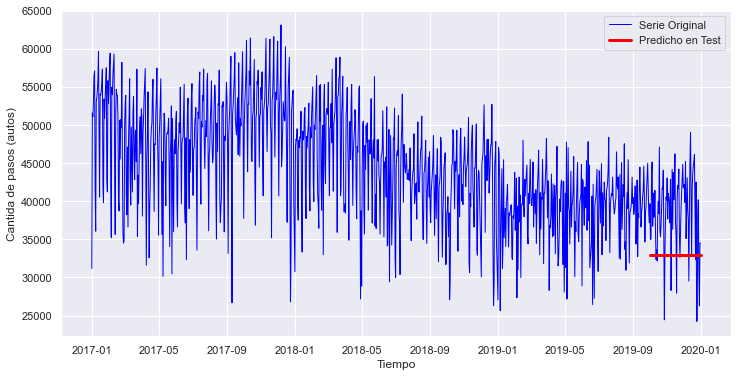

In [93]:
#Evaluamos el modelo:#Evaluamos el modelo:
evaluar_modelo(Test_diario, y_test_pred_diario_AutoTS, Test_diario, 'Test')

#Observamos el desempeño del modelo gráficamente:
plt.figure(figsize=(12,6))
plt.plot(diario_prediccion.index[:N], diario_prediccion[:N],'-', lw = 1, label = 'Serie Original', color = 'blue')
plt.plot(diario_prediccion.index[N_train: N], y_test_pred_diario_AutoTS,'-', lw = 3, label = 'Predicho en Test', color = 'red')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantida de pasos (autos)')
plt.show()

Analizando a lo expuesto anteriormente, el mejor modelo encontrado por el algoritmo nos da como resultado un **MAE de 6.700, lo que representa un 17,3 % de la cantidad total de autos que pasan por día en la estación**, por lo que el modelo óptimo encontrado por este algoritmo, nos da como resultado un **peor desempeño** a los modelos utilizados anteriormente. Esto puede ser debido a que el modelo encontrado como óptimo utiliza el promedio de valores anteriores para efectuar las predicciones, por ello en la gráfica se ve como línea recta.

## C. Prophet:

La librería **Prophet** es una librería desarrollada por Facebook y es conocida por su buen desempeño en los pronósticos de series temporales que tienen estacionalidad, y permite realizar predicciones con intérvalos de confianza. Asimismo, es robusta ante los datos faltantes y los cambios en la tendencia, y permite incluir los efectos de las vacaciones.

Cabe destacar que los modelos de predicción de esta librería se encontraban incluidos dentro de los modelos evaluados en el punto anterior, pero en este punto los estudiaremos más a detalle y analizaremos si al incluir información adicional como los períodos vacacionales en Argentina, se obtiene un mejor resultado en la predicción.

In [87]:
# #Instalamos la librería:
# !pip install pystan==2.19.1.1
# !pip install prophet

In [88]:
#Importamos el modelo:
from prophet import Prophet

#Instanciamos el modelo con los parámetros por defecto, que identificarán cambios de tendencia y estacionalidad automáticamente:
modelo_Prophet = Prophet()

#Agregamos los períodos vacacionales en Argentina:
modelo_Prophet.add_country_holidays(country_name = 'AR')

#Entrenamos el modelo con los datos de entrenamiento, que deben estar en un formato DataFrame específico de pandas, 
#exponiendo las fechas y valores en dos columnas por separado, llamadas 'ds' e 'y', repectivamente:
diario_Prophet = diario_depurado.copy()
diario_Prophet.drop(columns='dia', inplace = True)
diario_Prophet.reset_index(inplace = True)
diario_Prophet = diario_Prophet.rename(columns={'fecha':'ds','cantidad_pasos':'y'})

N = diario_Prophet.shape[0]
N_test = 92 #correspondiente a los días del último trimestre del 2019
N_train = N - N_test # cantidad de instancias que vamos a usar para entrenar. 

Train_diario_Prophet = diario_Prophet[:N_train]
Test_diario_Prophet = diario_Prophet[N_train:N]

#Entrenamos el modelo:
modelo_Prophet.fit(Train_diario_Prophet)

Importing plotly failed. Interactive plots will not work.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [89]:
#Analizamos los períodos vacacionales considerados por la librería:
modelo_Prophet.train_holiday_names

0                            Año Nuevo [New Year's Day]
1                      Día de Carnaval [Carnival's Day]
2     Día Nacional de la Memoria por la Verdad y la ...
3     Semana Santa (Jueves Santo)  [Holy day (Holy T...
4     Semana Santa (Viernes Santo)  [Holy day (Holy ...
5                           Día de Pascuas [Easter Day]
6     Día del Veterano y de los Caidos en la Guerra ...
7                          Día del Trabajo [Labour Day]
8     Día de la Revolucion de Mayo [May Revolution Day]
9     Día Pase a la Inmortalidad del General Martín ...
10    Día Pase a la Inmortalidad del General D. Manu...
11           Día de la Independencia [Independence Day]
12    Día Pase a la Inmortalidad del General D. José...
13    Día del Respeto a la Diversidad Cultural [Resp...
14    Día Nacional de la Soberanía [National Soverei...
15     La Inmaculada Concepción [Immaculate Conception]
16                                  Navidad [Christmas]
dtype: object

Como podemos ver en el apartado anterior, los días festivos o vacacionales incluidos por la librería no necesariamente se condicen con las fechas festivas reales, situación que se da porque en Argentina muchas de estas fechas cambian de año a año en función de decisiones políticas o para fomentar el turismo.

A continuación realizamos la predicción y evaluamos los resultados obtenidos:

In [90]:
#En primer lugar, creamos el dataframe donde se incluirán las predicciones, que toma las fechas utilizadas para el entrenamiento 
#y agrega las fechas sobre las cuales se realizará la prediccón:
df_futuro = modelo_Prophet.make_future_dataframe(periods=N_test)

#Completamos el dataframe con las predicciones realizadas por el modelo:
predicciones = modelo_Prophet.predict(df_futuro)
predicciones

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0    2017-01-01  49683.096503  23258.962302  33594.715711  49683.096503   
1    2017-01-02  49680.226610  42469.226602  52563.828946  49680.226610   
2    2017-01-03  49677.356717  43649.728512  53703.158594  49677.356717   
3    2017-01-04  49674.486823  44903.666884  54975.312815  49674.486823   
4    2017-01-05  49671.616930  46374.432762  56062.161675  49671.616930   
...         ...           ...           ...           ...           ...   
1090 2019-12-27  40334.270745  40777.802572  51173.074163  40034.228008   
1091 2019-12-28  40334.624481  32457.622357  42473.776014  40027.590897   
1092 2019-12-29  40334.978218  27988.849412  38012.729794  40023.163650   
1093 2019-12-30  40335.331955  34286.876456  43763.998241  40018.799123   
1094 2019-12-31  40335.685691  34761.119576  44763.540744  40011.891110   

       trend_upper  Año Nuevo [New Year's Day]  \
0     49683.096503               -12890.815177   
1     49680.226610                    0.000000   
2     49677.356717                    0.000000   
3     49674.486823                    0.000000   
4     49671.616930                    0.000000   
...            ...                         ...   
1090  40609.459229                    0.000000   
1091  40614.866856                    0.000000   
1092  40619.913031                    0.000000   
1093  40624.308242                    0.000000   
1094  40629.955166                    0.000000   

      Año Nuevo [New Year's Day]_lower  Año Nuevo [New Year's Day]_upper  \
0                        -12890.815177                     -12890.815177   
1                             0.000000                          0.000000   
2                             0.000000                          0.000000   
3                             0.000000                          0.000000   
4                             0.000000                          0.000000   
...                                ...                               ...   
1090                          0.000000                          0.000000   
1091                          0.000000                          0.000000   
1092                          0.000000                          0.000000   
1093                          0.000000                          0.000000   
1094                          0.000000                          0.000000   

      Día Nacional de la Memoria por la Verdad y la Justicia [Memory's National Day for the Truth and Justice]  \
0                                                   0.0                                                          
1                                                   0.0                                                          
2                                                   0.0                                                          
3                                                   0.0                                                          
4                                                   0.0                                                          
...                                                 ...                                                          
1090                                                0.0                                                          
1091                                                0.0                                                          
1092                                                0.0                                                          
1093                                                0.0                                                          
1094                                                0.0                                                          

      ...       weekly  weekly_lower  weekly_upper       yearly  yearly_lower  \
0     ... -7155.527906  -7155.527906  -7155.527906 -1128.182254  -1128.182254   
1     ...  -862.399485   -862.399485   -862.399485 -1266.562317  -1

Como podemos ver, al efectuar las predicciones el modelo genera un nuevo Dataframe que contiene muchisima información respecto de la tendencia, las fechas festivas o vacaciones, estacionalidad, intervalos de confianza, etc, pero la columna que más nos interesa es la llamada ***yhat***, en la cual se encuentran las predicciones.

A continuación, analizamos el desempeño del modelo sobre los grupos de entrenamiento y prueba:

Error en Train: 2878.1854429139635 - Porcentual(%): 6.4576480981363895
Error en Test: 4668.9816272502985 - Porcentual(%): 12.105544733959029


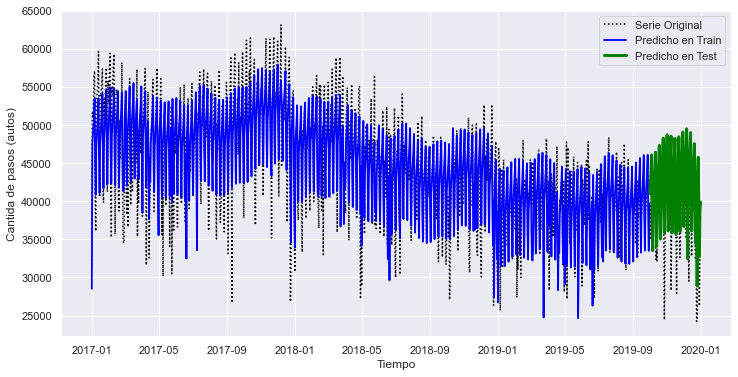

In [91]:
#En primer lugar, seleccionamos los valores predichos sobre los grupos de entrenamiento y prueba:
y_train_pred_diario_Prophet = predicciones.yhat[:N_train]
y_test_pred_diario_Prophet = predicciones.yhat[N_train:N]

#Evaluamos el desempeño del modelo en ambos grupos:
evaluar_modelo(Train_diario, y_train_pred_diario_Prophet, Train_diario, 'Train')
evaluar_modelo(Test_diario, y_test_pred_diario_Prophet, Test_diario, 'Test')

#Analizamos el desempeño gráficamente:
plt.figure(figsize=(12,6))
plt.plot(diario_Prophet.ds[:N], diario_Prophet.y[:N],':', lw = 1.5, label = 'Serie Original', color='black')
plt.plot(diario_Prophet.ds[:N_train], y_train_pred_diario_Prophet,'-',lw = 1.8, label = 'Predicho en Train', color='blue')
plt.plot(diario_Prophet.ds[N_train:N], y_test_pred_diario_Prophet,'-', lw = 3, label = 'Predicho en Test', color = 'green')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantida de pasos (autos)')
plt.show()

De acuerdo a lo observado en los resultados obtenidos, el modelo obtuvo un **MAE aproximado de 2.900 sobre el grupo de entrenamiento** y de **4.700 sobre el grupo de prueba**, lo que representan el 6.45% y 12.10% (respectivamente) del total de autos promedio que atraviesa la estación de peaje. En la gráfica podemos observar también el impacto de haber agregado los días festivos o vacacionales al modelo, lo que nos dió como resultado predicciones inferiores para esos días.

Si bien este modelo **no mejoró los resultados** obtenidos por la predicción One-Step realizada anteriormente, cabe destacar que el modelo **se ajustó bastante bien al comportamiento de la serie**, replicando su tendencia y características estacionales.

# 5. CONCLUSIONES:

El objetivo de este proyecto era encontrar un modelo que prediga el tráfico de la autopista Illia para el último trimestre de 2019,  obteniendo como resultado un nivel de error en la predicción **menor** a los obtenidos en el Proyecto 3. Para tal fin, se entrenaron 3 nuevos modelos sobre la serie Diaria y al evaluar el desempeño de los mismos nos encontramos con que **ninguno fue capaz de reducir el error** que obteníamos al utilizar la técnica de predicción a un paso (**One-Step Prediction**) utilizando un modelo de Machine Learning, el Random Forest. Este último nos daba como resultado un MAE aproximado de **3.400**, que representa el **8.7 % de la cantidad de autos promedio diaria**.

De los 3 nuevos modelos utilizados, el que mejor resultados obtuvo fue el **modelo ARIMA**, con un **MAE aproximado de 3.900**, lo que representa un poco más del **10%** del promedio de autos que pasa por día por la estación. Esto pudo darse debido a que la serie presenta un alto nivel de autocorrelación cada 7 días, y esto fue reflejado en el desempeño del modelo.

Por otro lado, el modelo de **AutoTS** se presentaba como un algoritmo prometedor, ya que permite entrenar muchos modelos distintos en una sola línea de código y selecciona aquel que es óptimo en función a una métrica seleccionada, pero sorprendentemente fue el que obtuvo un peor desempeño, elevando el **MAE** a **6.700 (MAPE de 17,3%)**.

Por último, el modelo **Prophet** obtuvo como resultado un **MAE de 4.700 sobre el grupo de prueba (MAPE 12,10%)**, el cual si bien no fue el mejor resultado, fue uno de los **que mejor replicó el comportamiento de la serie de tiempo**, tanto en el grupo de entrenamiento como el de prueba, teniendo en consideración los cambios estacionales de la serie y el impacto de los días festivos.